In [1]:
import pandas as pd

file_path = 'latest_combined.csv'
df = pd.read_csv(file_path, encoding='euc-kr')

df

NO            시군구   번지   본번  부번        단지명  전용면적(㎡)    계약년월  계약일  \
0      1  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    59.28  202409   11   
1      2  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    58.01  202409    7   
2      3  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  202408   28   
3      4  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  202408   28   
4      5  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    58.01  202408   27   
...   ..            ...  ...  ...  ..        ...      ...     ...  ...   
1872  79  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200603   15   
1873  80  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    41.30  200603   20   
1874  81  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200603   22   
1875  82  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    41.30  200602   10   
1876  83  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200602    9   

     거래금액(만원)  동   층 매수자 매도자  건축년도         도로명 해제사유발생일  거래유형  중개사소재지 등기일자  
0      55,000  -  10  개인  개인  1988  덕릉로 459-21       -  중개거래  서울 노원구    -  
1      58,000  -   6  개인  개인  1988  동일로213길 21       -  중개거래  서울 노원구    -  
2      36,700  -  12  개인  개인  1988  동일로213길 21       -  중개거래  서울 노원구    -  
3      36,000  -  10  개인  개인  1988  동일로213길 21       -  중개거래  서울 노원구    -  
4      53,000  -   8  개인  개인  1988  덕릉로 459-21       -  중개거래   부산 남구    -  
...       ... ..  ..  ..  ..   ...         ...     ...   ...     ...  ...  
1872    6,750  -   9   -   -  1988  동일로213길 21       -     -       -    -  
1873    8,300  -   3   -   -  1988  동일로213길 21       -     -       -    -  
1874    7,000  -   3   -   -  1988  동일로213길 21       -     -       -    -  
1875    8,100  -  12   -   -  1988  동일로213길 21       -     -       -    -  
1876    6,550  -  12   -   -  1988  동일로213길 21       -     -       -    -  

[1877 rows x 20 columns]

In [2]:
df['거래금액(백만원)'] = df['거래금액(만원)'].str.replace(',', '').astype(int)/100
df['전용면적'] = df['전용면적(㎡)']

df['계약년월'] = df['계약년월'].astype(str)
df['연도'] = df['계약년월'].str[:4]
df['월'] = df['계약년월'].str[4:6]

df['계약일'] = df['계약일'].astype(str).str.zfill(2)

df['계약일자'] = pd.to_datetime(df['연도'] + '-' + df['월'] + '-' + df['계약일'])

In [3]:
interest_rate_df = pd.read_csv('interest_rate.csv')
interest_rate_df['date'] = pd.to_datetime(interest_rate_df['date'])
df['금리'] = None
for index, row in df.iterrows():
    contract_date = row['계약일자']
    previous_rate = interest_rate_df[interest_rate_df['date'] < contract_date]['interest'].iloc[-1] if not interest_rate_df[interest_rate_df['date'] < contract_date].empty else None
    df.at[index, '금리'] = previous_rate


In [4]:
start_date = pd.to_datetime('2006-01-01')
df['계약일자'] = pd.to_datetime(df['계약일자'])
df['계약일자'] = (df['계약일자'] - start_date).dt.days

df

NO            시군구   번지   본번  부번        단지명  전용면적(㎡)    계약년월 계약일  \
0      1  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    59.28  202409  11   
1      2  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    58.01  202409  07   
2      3  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  202408  28   
3      4  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  202408  28   
4      5  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    58.01  202408  27   
...   ..            ...  ...  ...  ..        ...      ...     ...  ..   
1872  79  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200603  15   
1873  80  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    41.30  200603  20   
1874  81  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200603  22   
1875  82  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    41.30  200602  10   
1876  83  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)    32.39  200602  09   

     거래금액(만원)  ... 해제사유발생일  거래유형  중개사소재지 등기일자  거래금액(백만원)   전용면적    연도   월  \
0      55,000  ...       -  중개거래  서울 노원구    -      550.0  59.28  2024  09   
1      58,000  ...       -  중개거래  서울 노원구    -      580.0  58.01  2024  09   
2      36,700  ...       -  중개거래  서울 노원구    -      367.0  32.39  2024  08   
3      36,000  ...       -  중개거래  서울 노원구    -      360.0  32.39  2024  08   
4      53,000  ...       -  중개거래   부산 남구    -      530.0  58.01  2024  08   
...       ...  ...     ...   ...     ...  ...        ...    ...   ...  ..   
1872    6,750  ...       -     -       -    -       67.5  32.39  2006  03   
1873    8,300  ...       -     -       -    -       83.0  41.30  2006  03   
1874    7,000  ...       -     -       -    -       70.0  32.39  2006  03   
1875    8,100  ...       -     -       -    -       81.0  41.30  2006  02   
1876    6,550  ...       -     -       -    -       65.5  32.39  2006  02   

      계약일자    금리  
0     6828   3.0  
1     6824   3.0  
2     6814   3.0  
3     6814   3.0  
4     6813   3.0  
...    ...   ...  
1872    73   4.0  
1873    78   4.0  
1874    80   4.0  
1875    40   4.0  
1876    39  3.75  

[1877 rows x 26 columns]

In [5]:
# Label Encoding

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

input=df[['계약일자', '전용면적','층','거래금액(백만원)', '연도']]

X=input.drop('거래금액(백만원)', axis=1)
y=input['거래금액(백만원)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=X['연도'])
X_train=X_train.drop('연도', axis=1)
X_test=X_test.drop('연도', axis=1)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
relation_score = model.score(X_test, y_test)

print(f'MSE: {mse}, R2: {r2}, 결정계수: {relation_score}')

MSE: 359.95204959805324, R2: 0.9803874338587922, 결정계수: 0.9803874338587922


In [6]:
results = pd.DataFrame({'Predict': y_pred, 'Truth': y_test, 'Diff': (y_pred-y_test)})
#results.to_csv('Predicted_Price.csv', index=False, encoding='utf-8')

In [7]:
results

Predict  Truth     Diff
1097  225.9600  236.0 -10.0400
261   445.9500  430.0  15.9500
1492  194.0000  197.0  -3.0000
575   309.4596  330.0 -20.5404
947   214.7000  180.0  34.7000
...        ...    ...      ...
1178  254.7750  239.5  15.2750
382   462.4500  379.0  83.4500
987   234.0400  250.0 -15.9600
1707  133.7400  135.0  -1.2600
882   188.4800  202.5 -14.0200

[188 rows x 3 columns]

In [8]:
def convert_days_to_date(days_column):
    # 기준 날짜 설정
    base_date = pd.to_datetime('2006-01-01')
    
    # days_column 값을 날짜로 변환
    return base_date + pd.to_timedelta(days_column, unit='D')


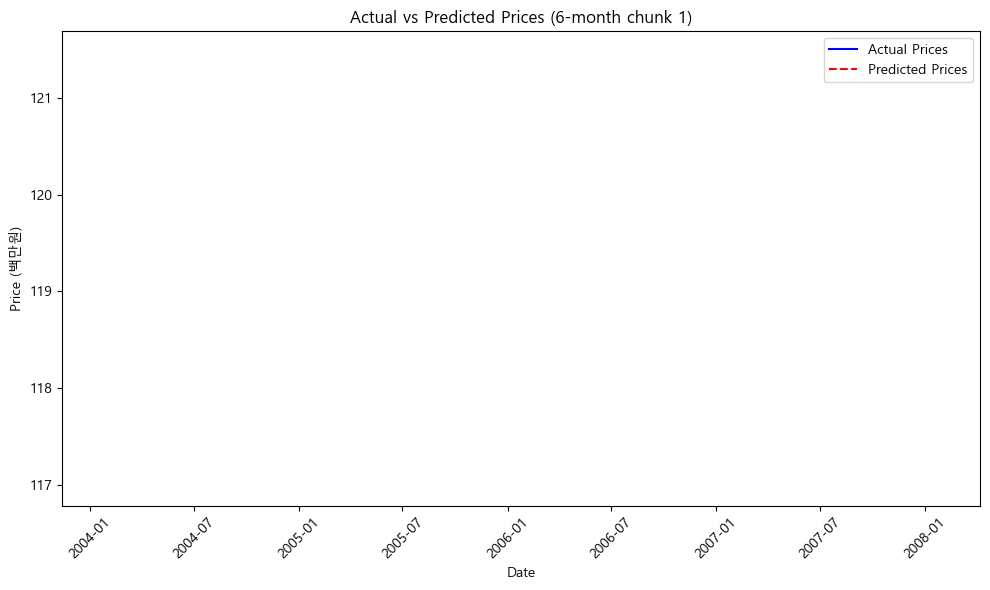

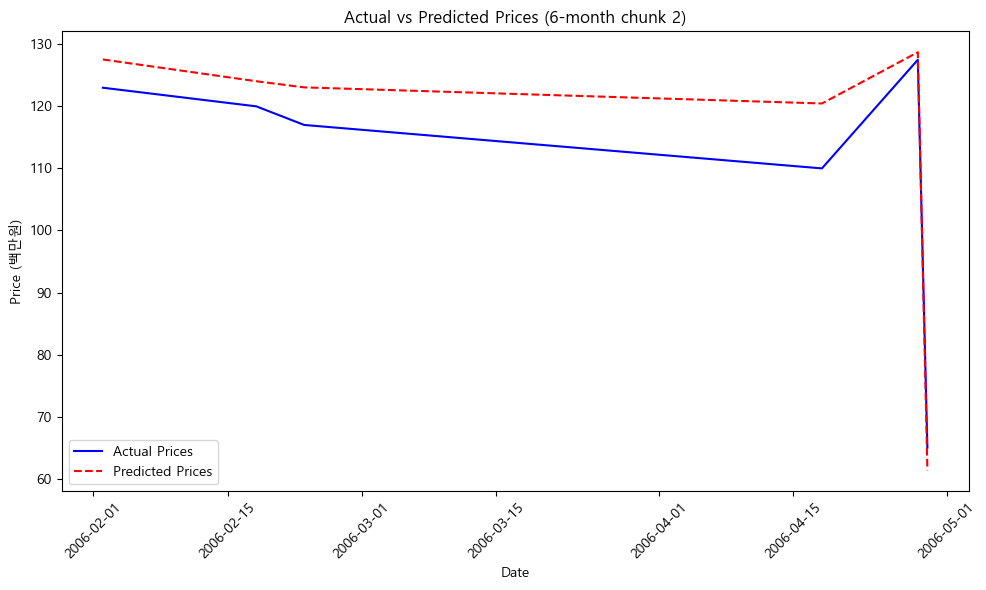

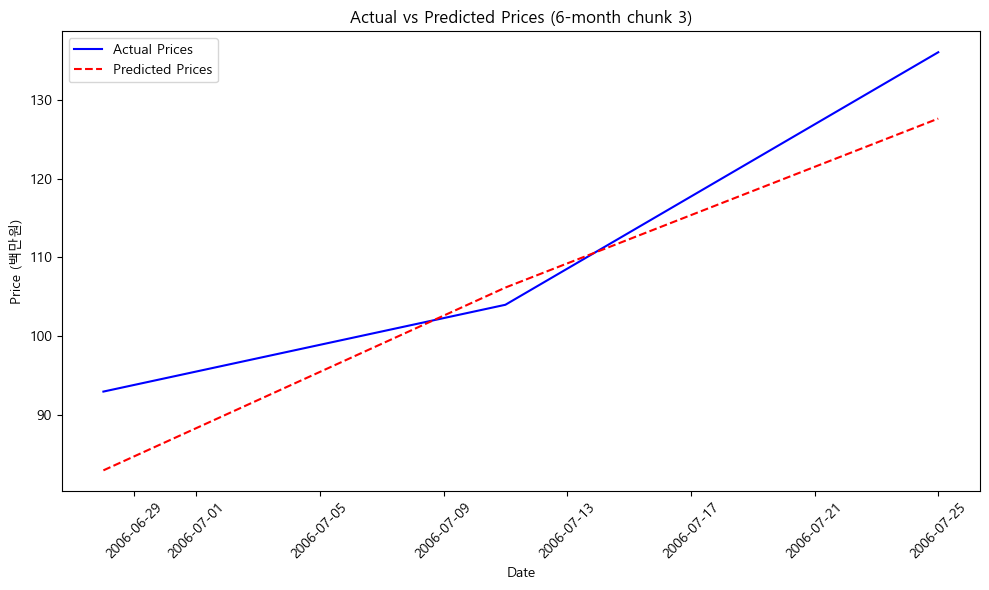

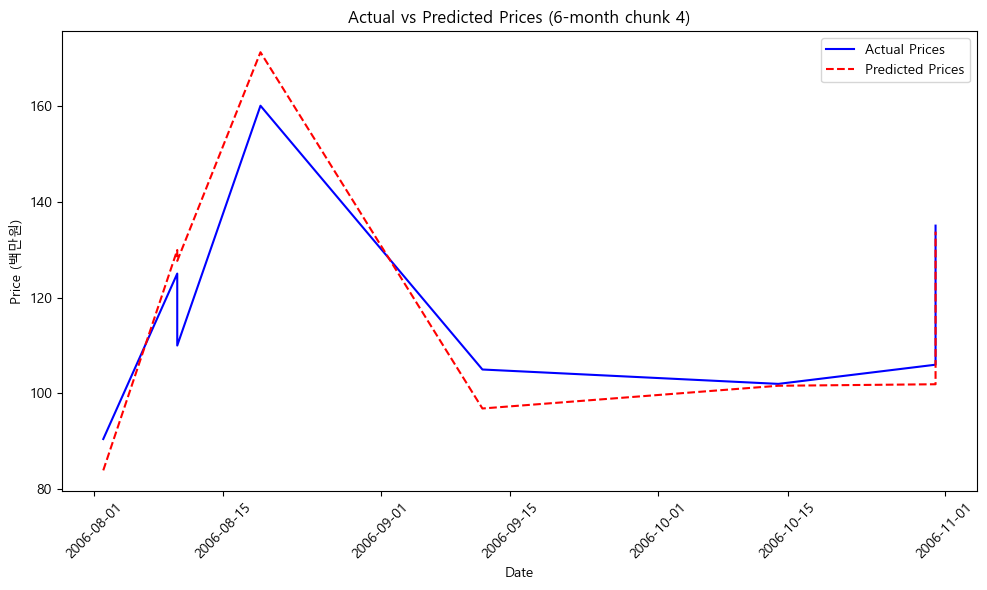

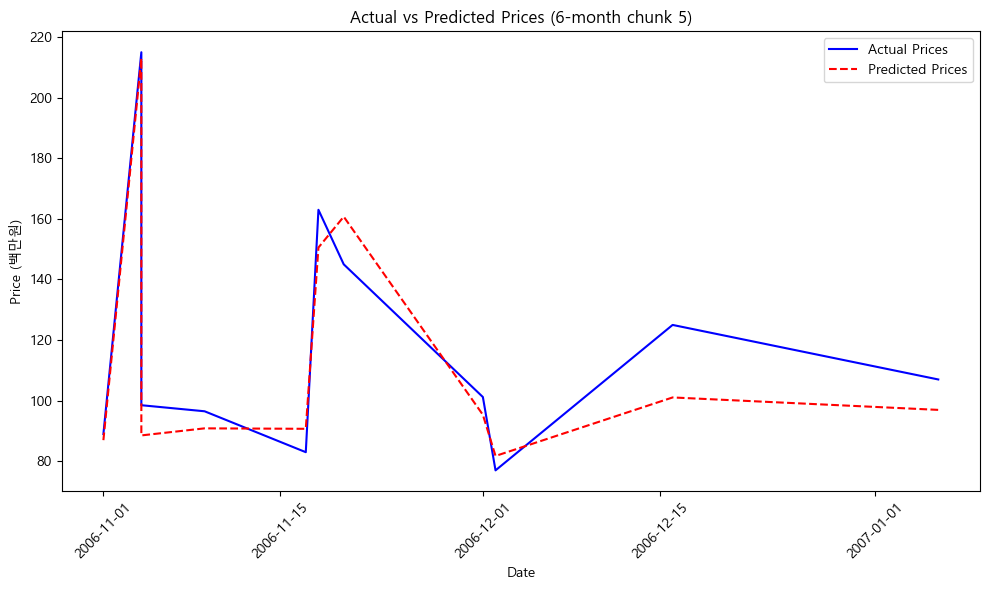

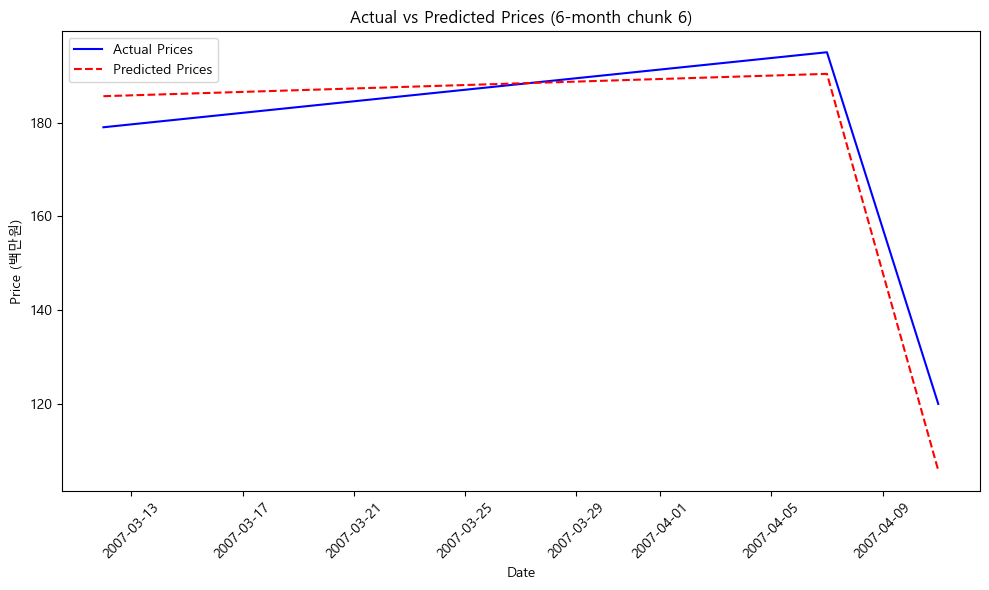

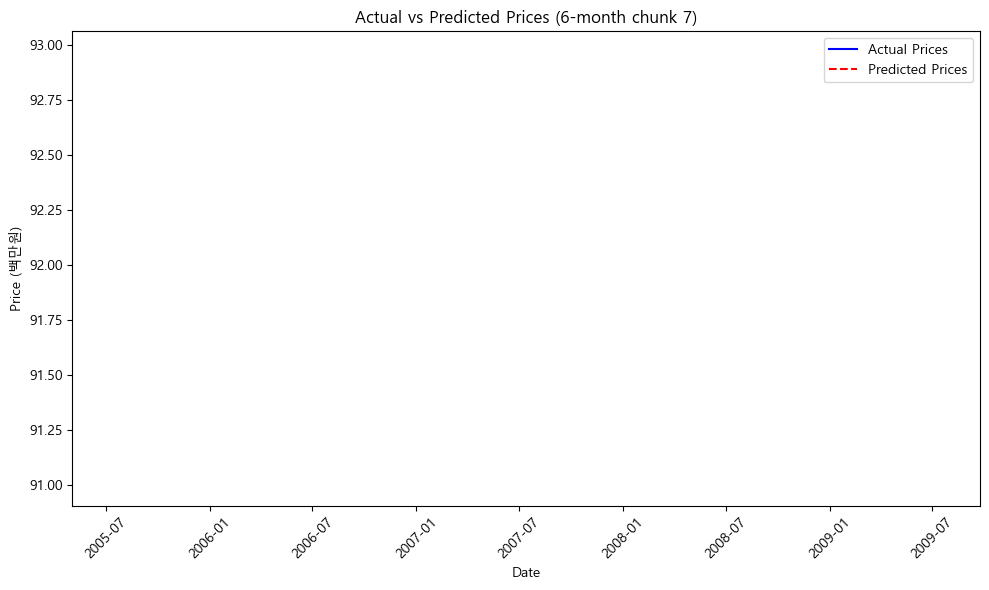

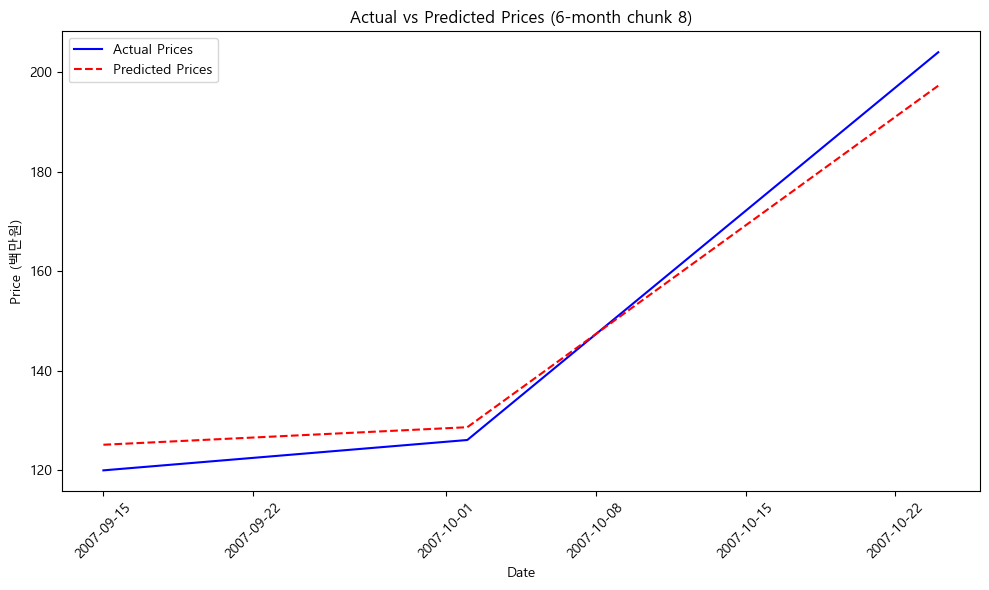

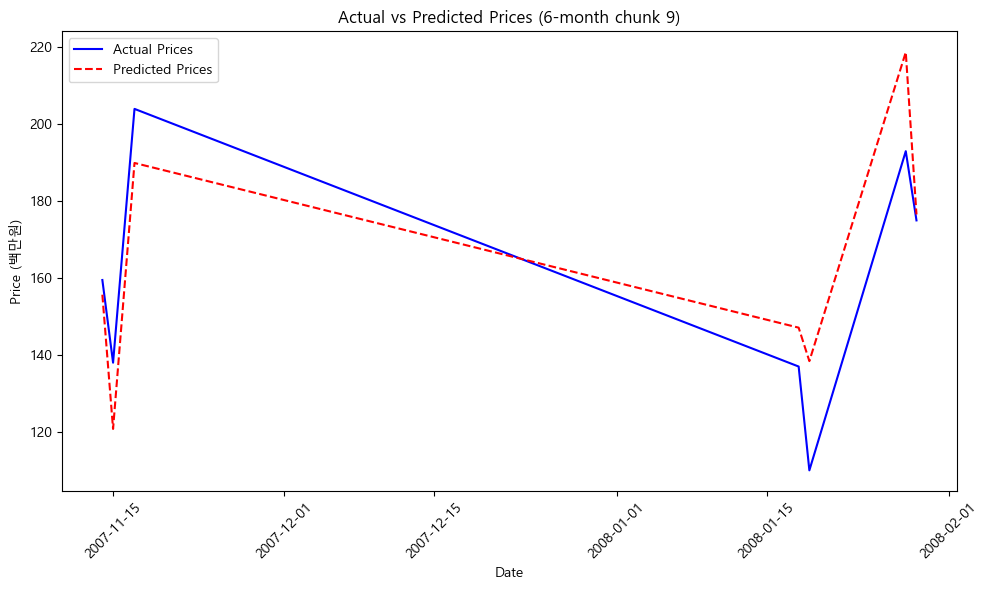

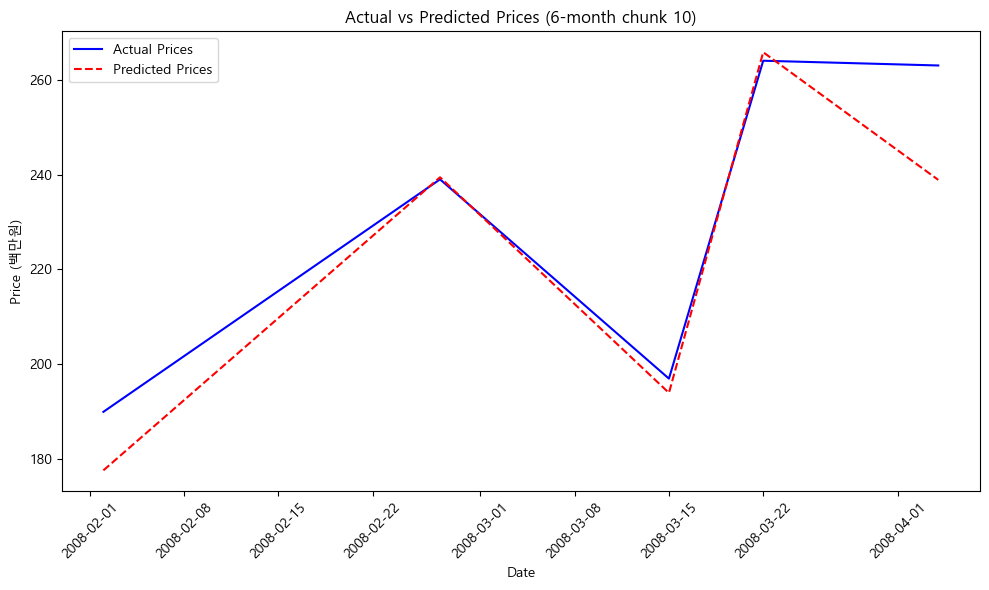

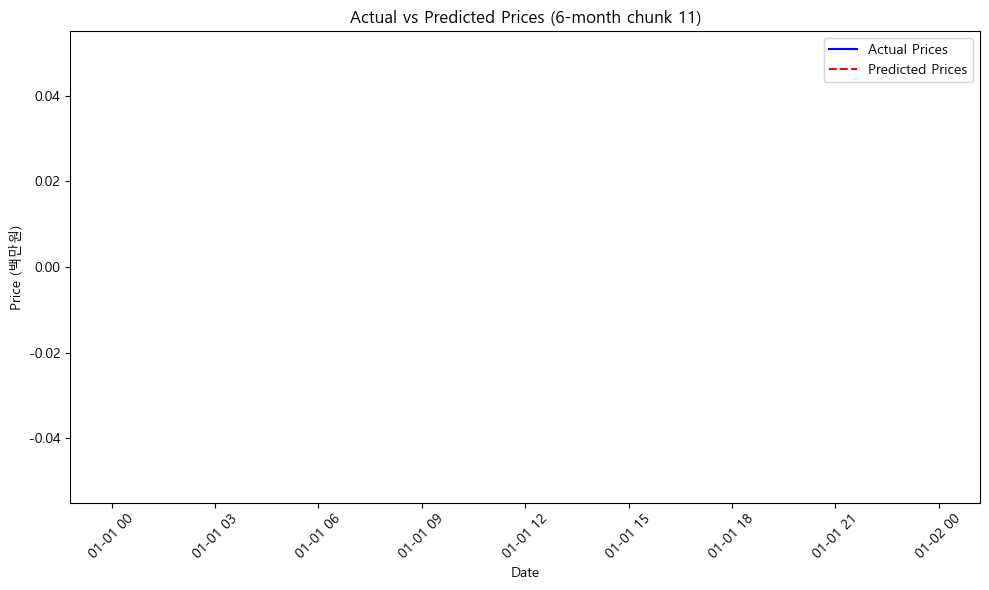

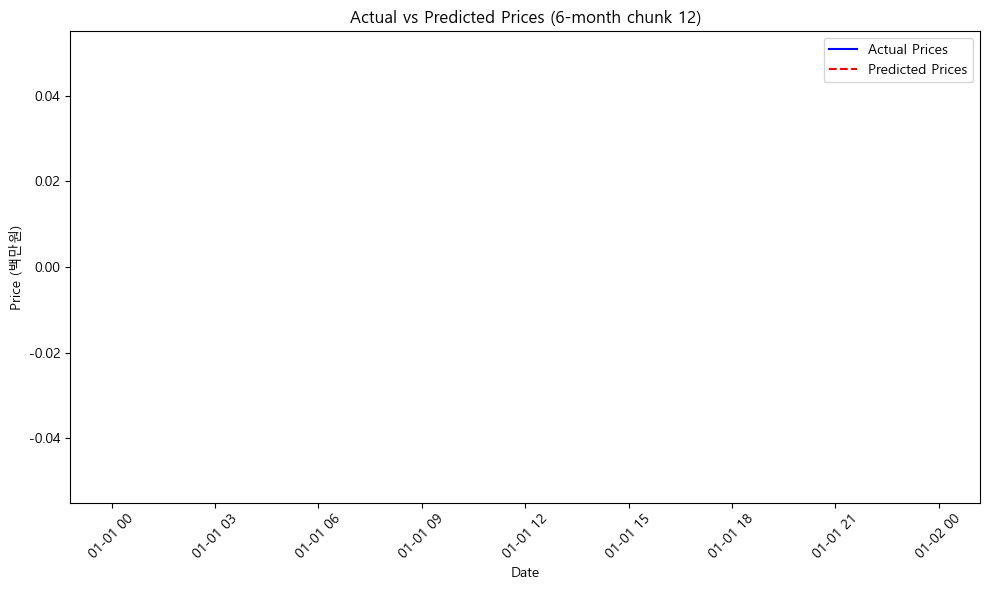

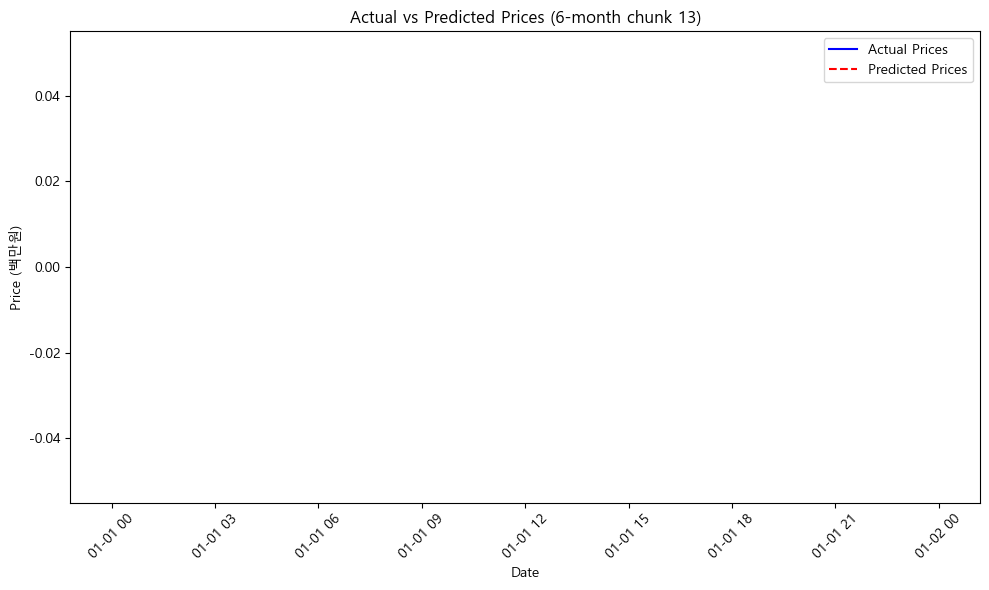

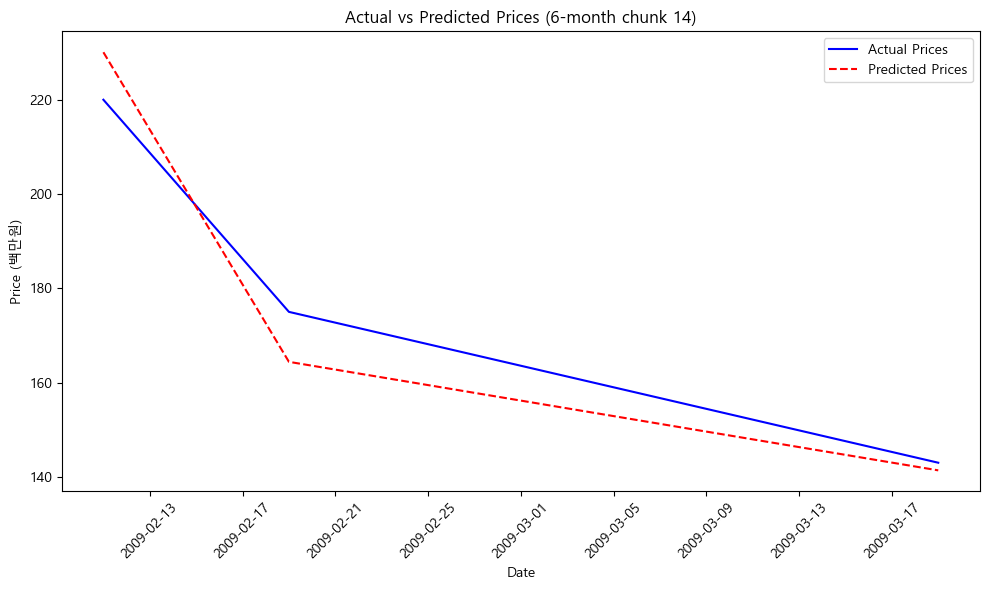

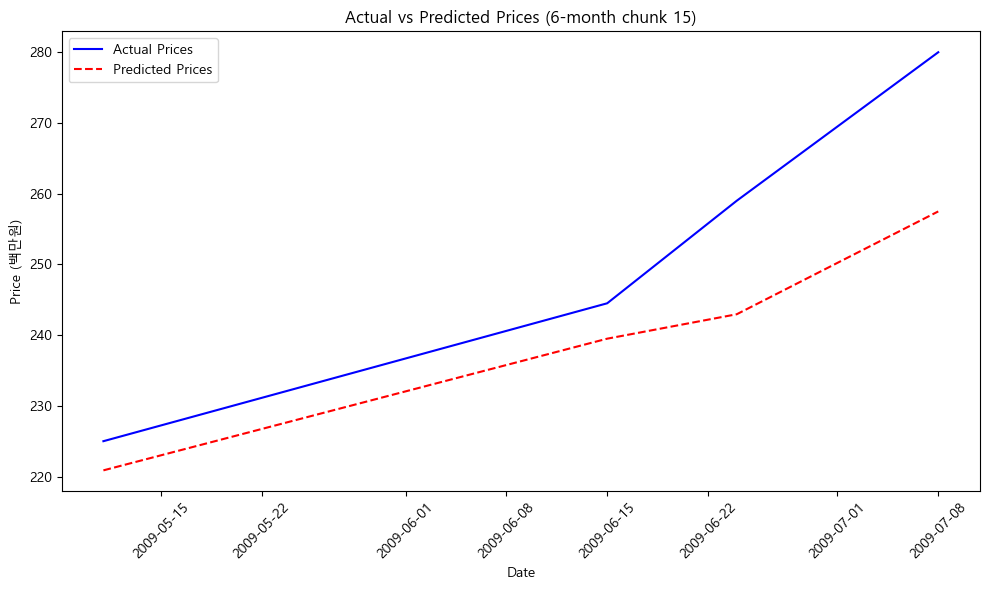

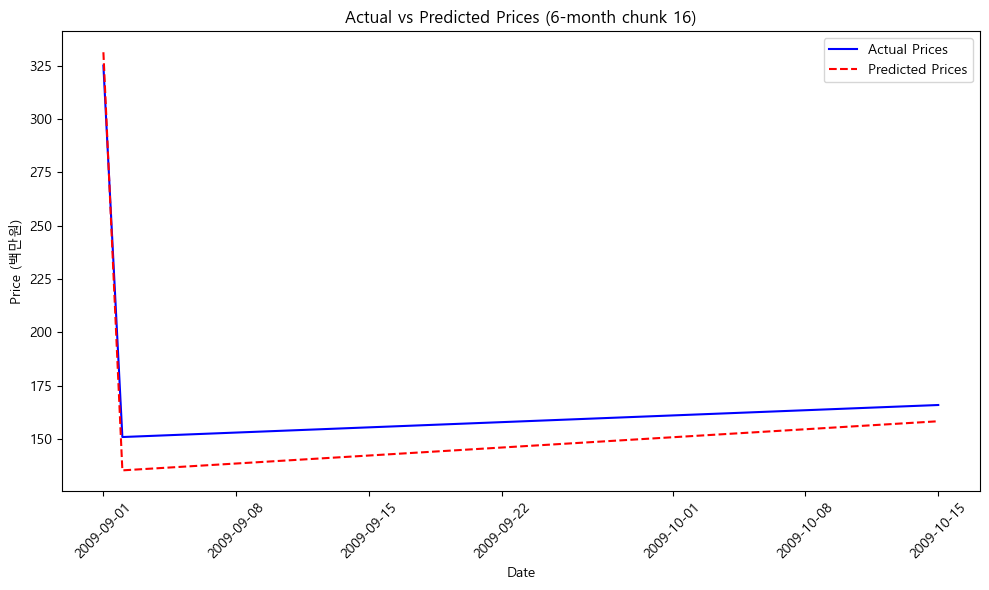

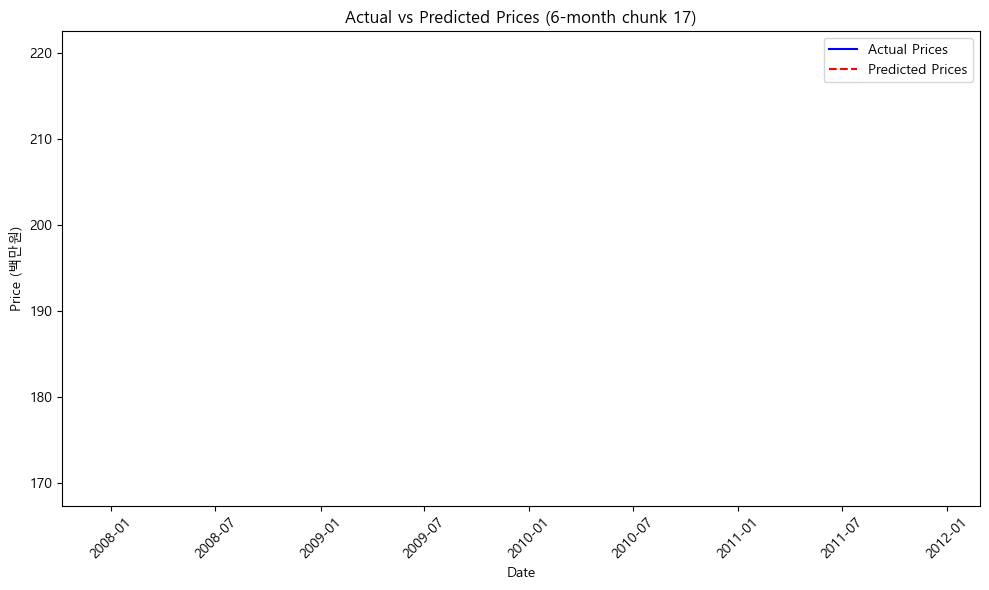

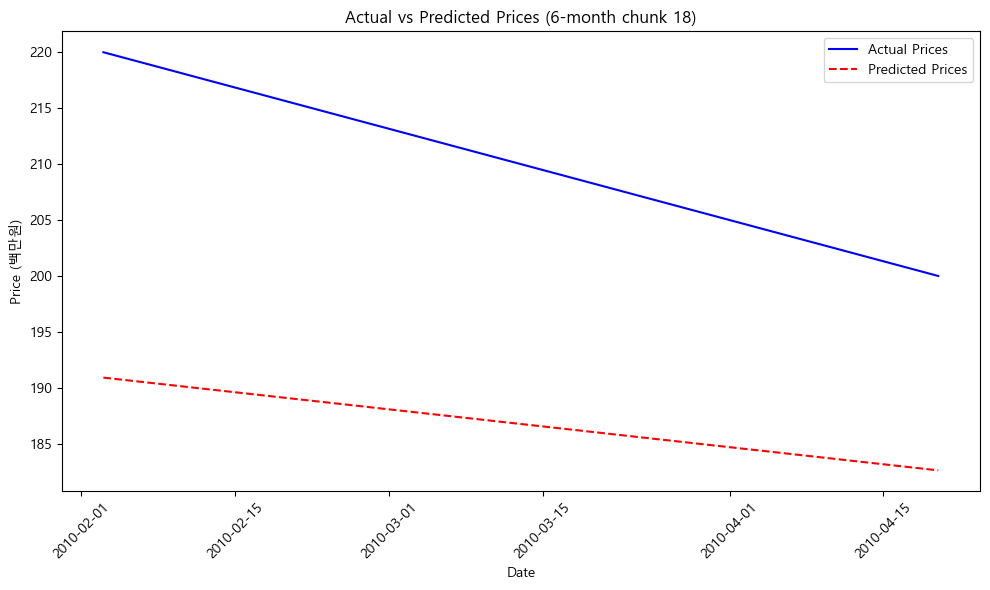

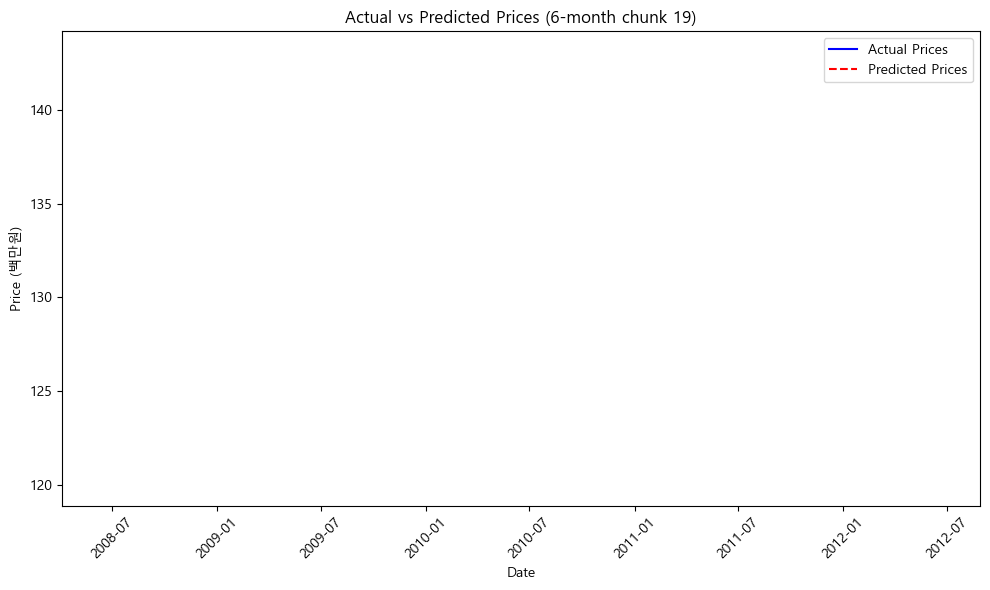

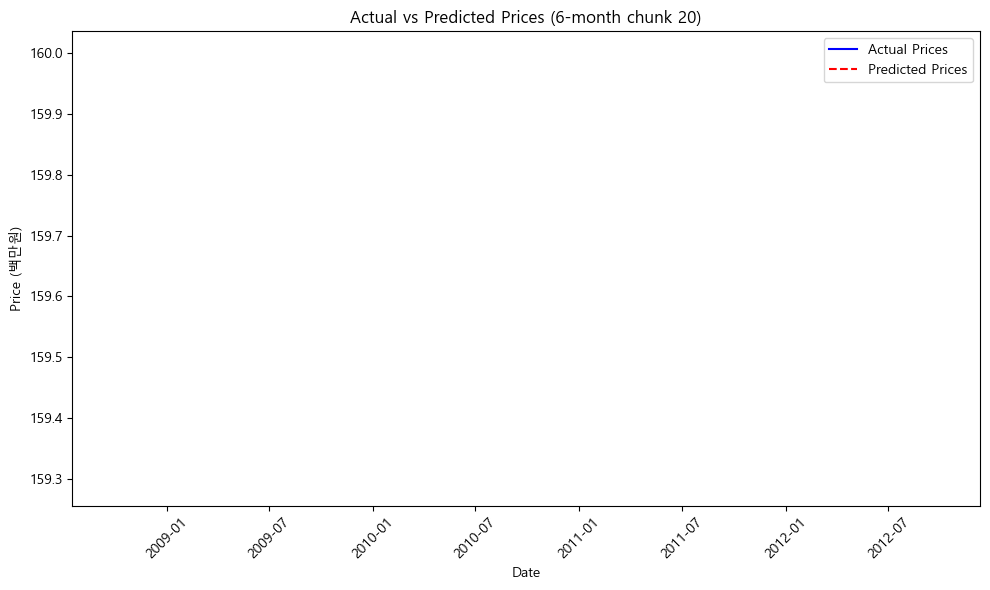

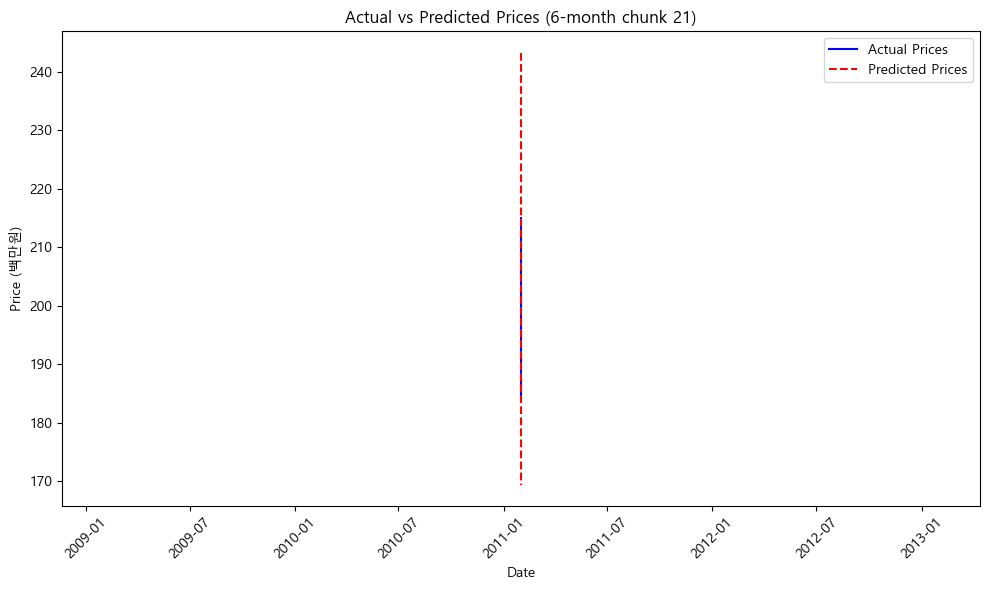

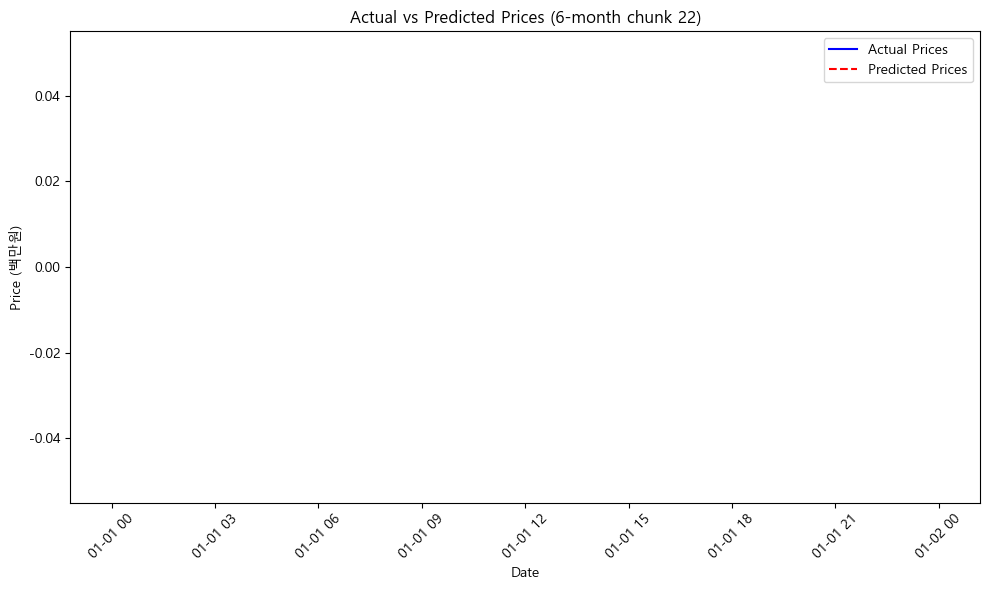

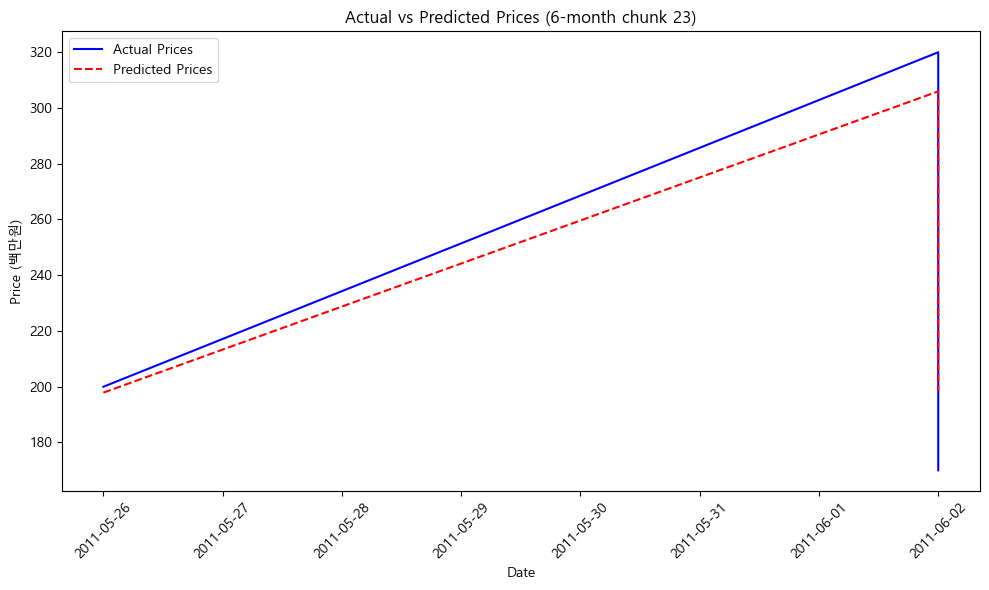

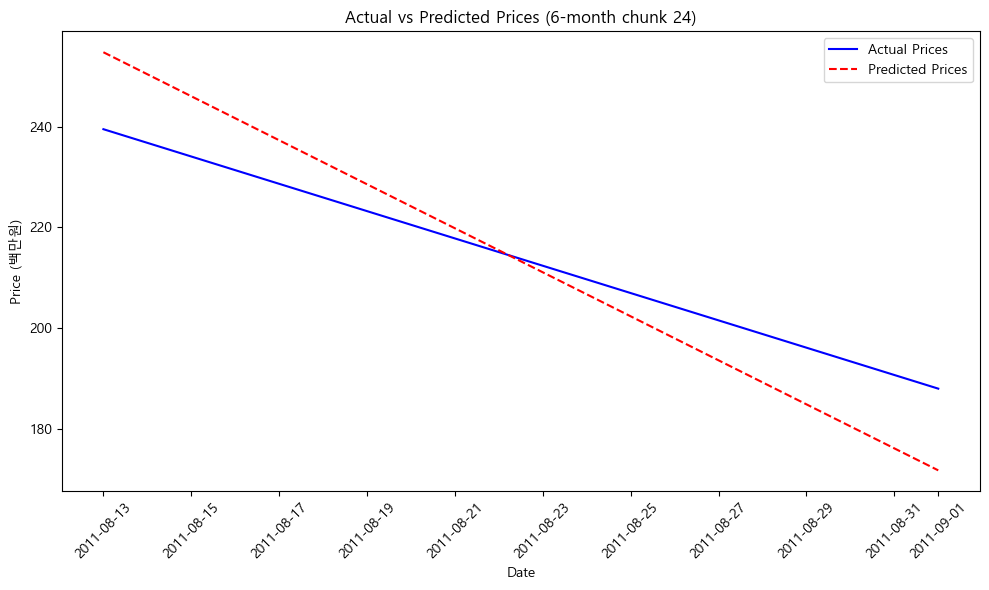

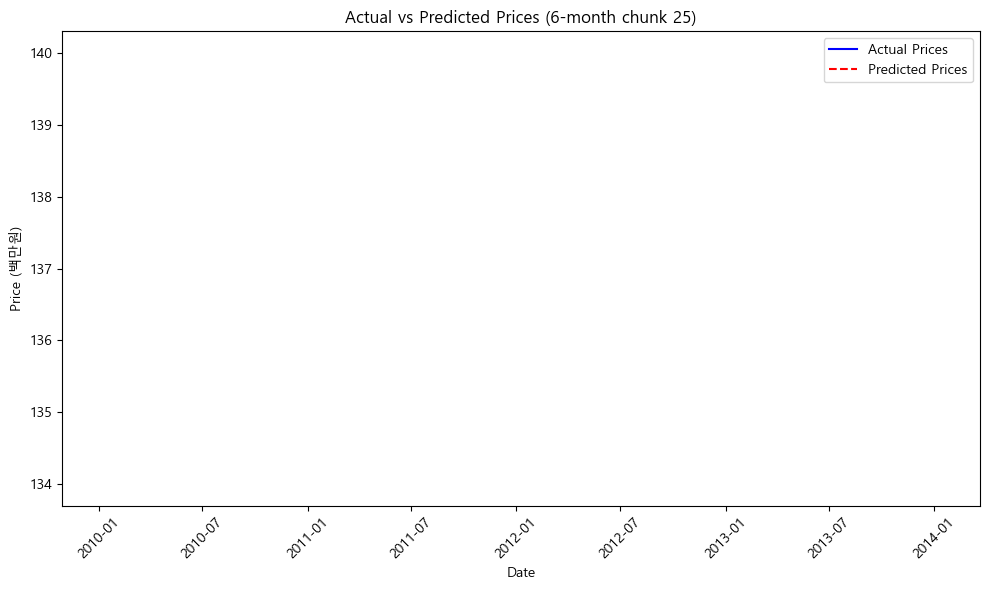

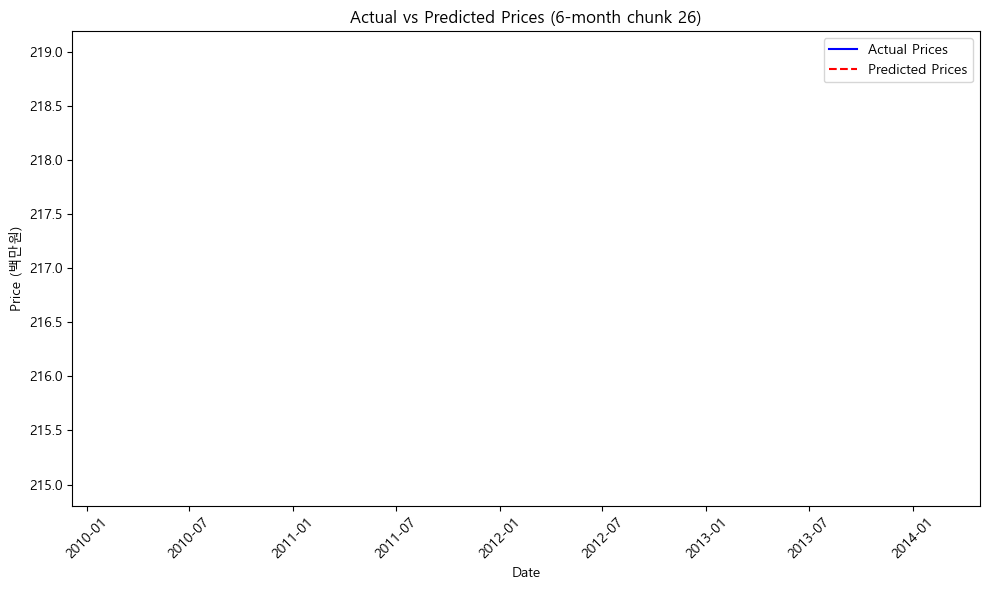

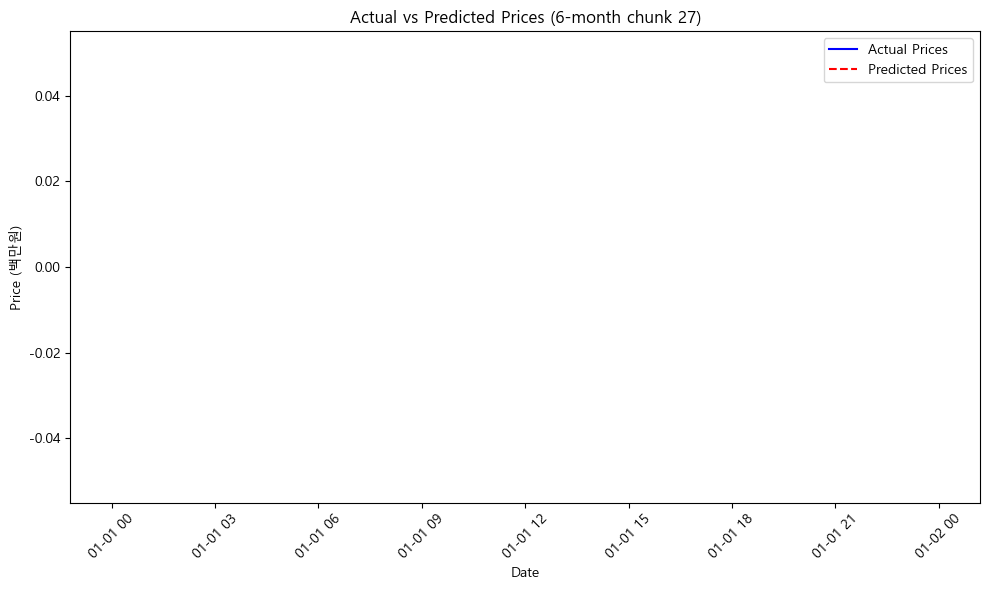

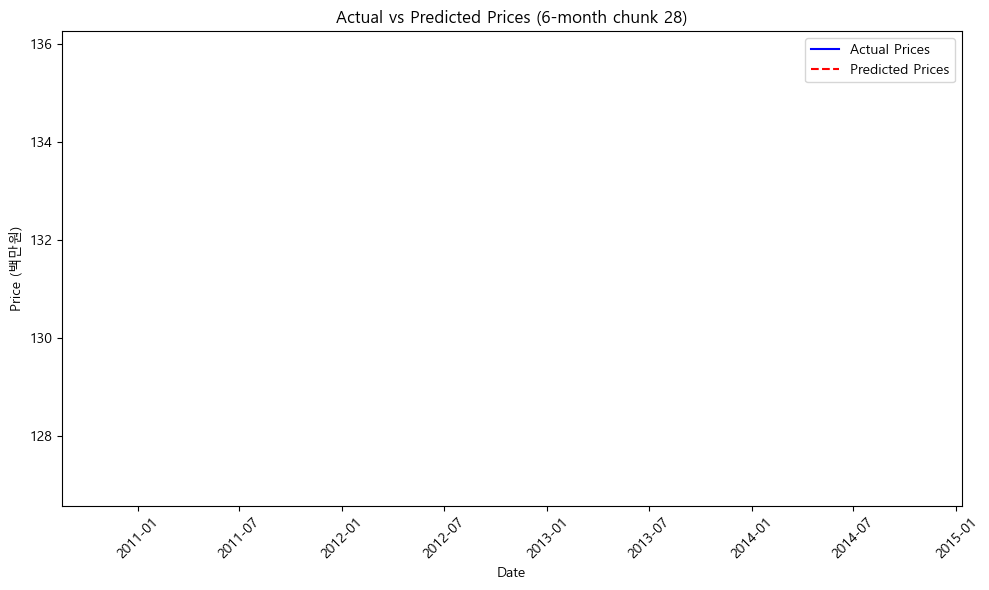

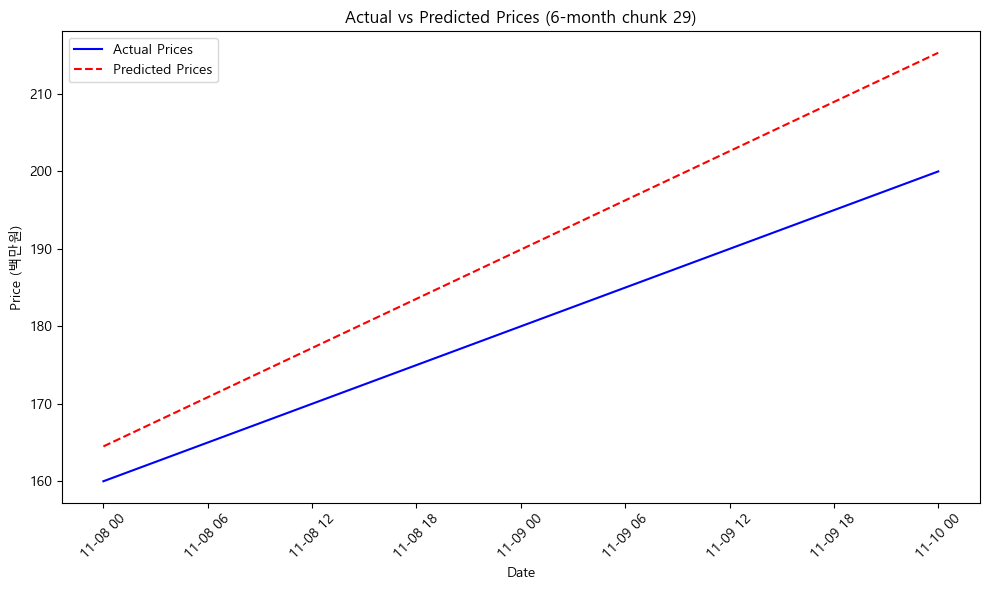

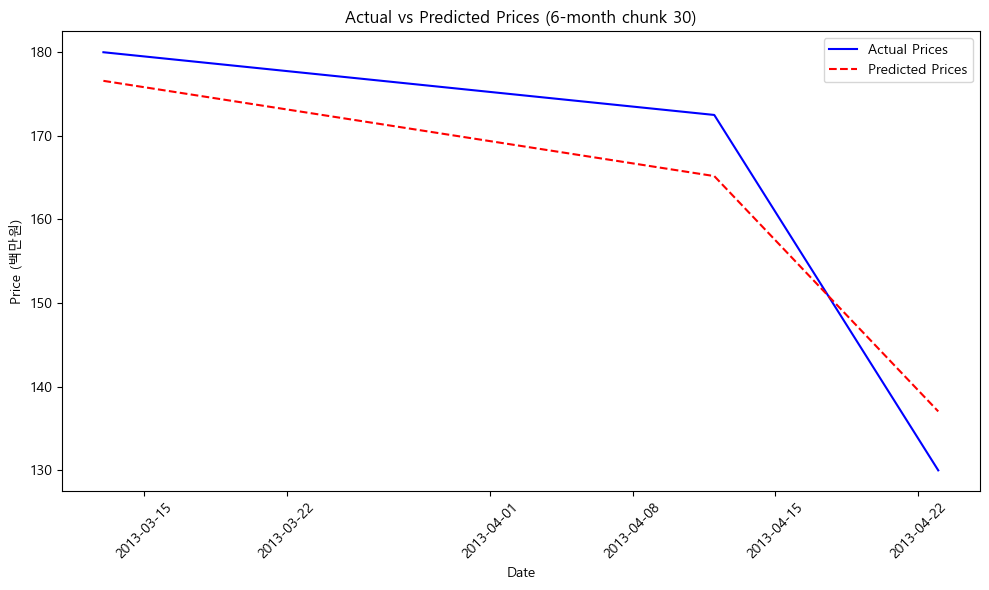

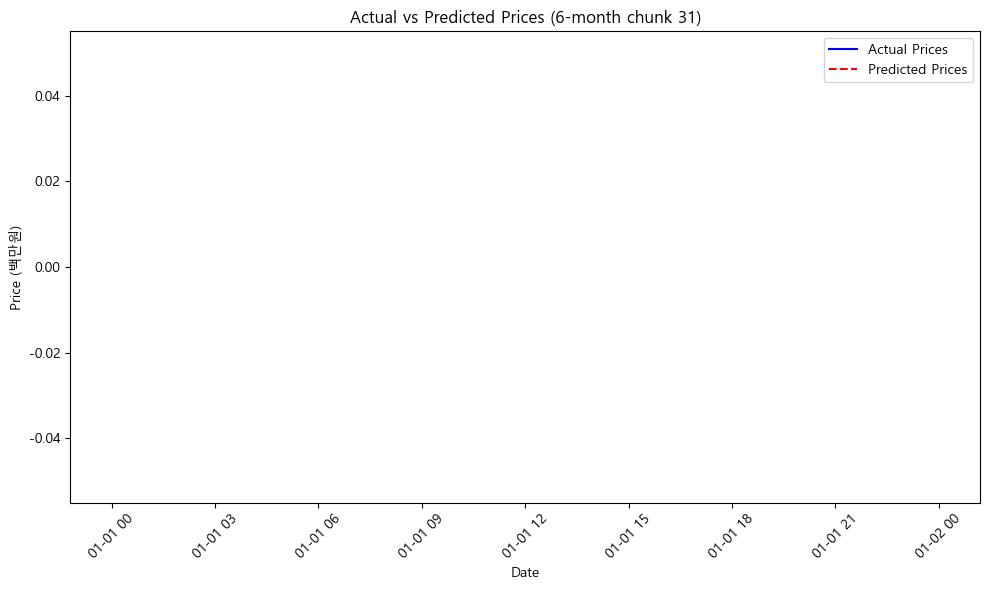

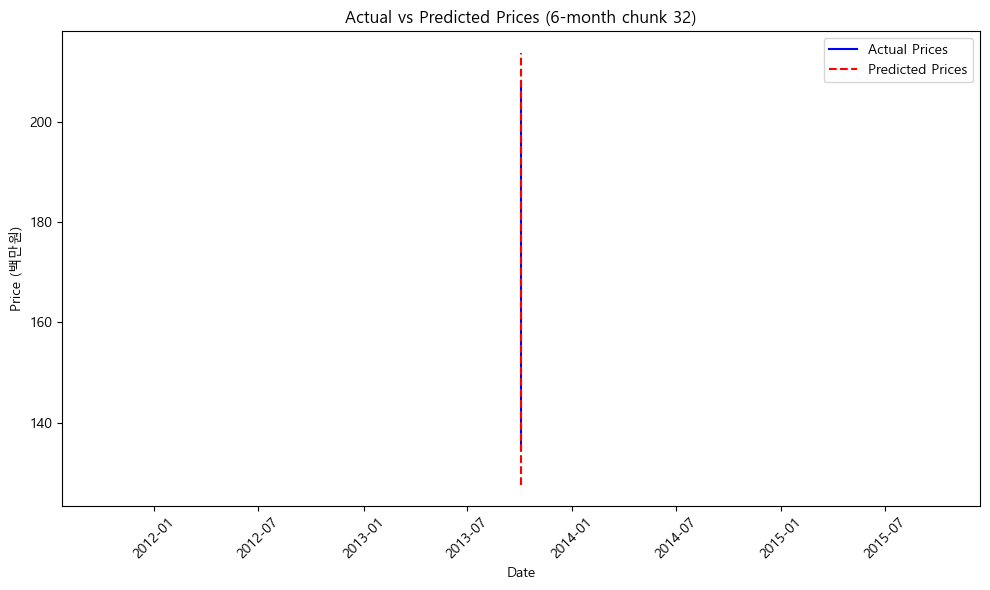

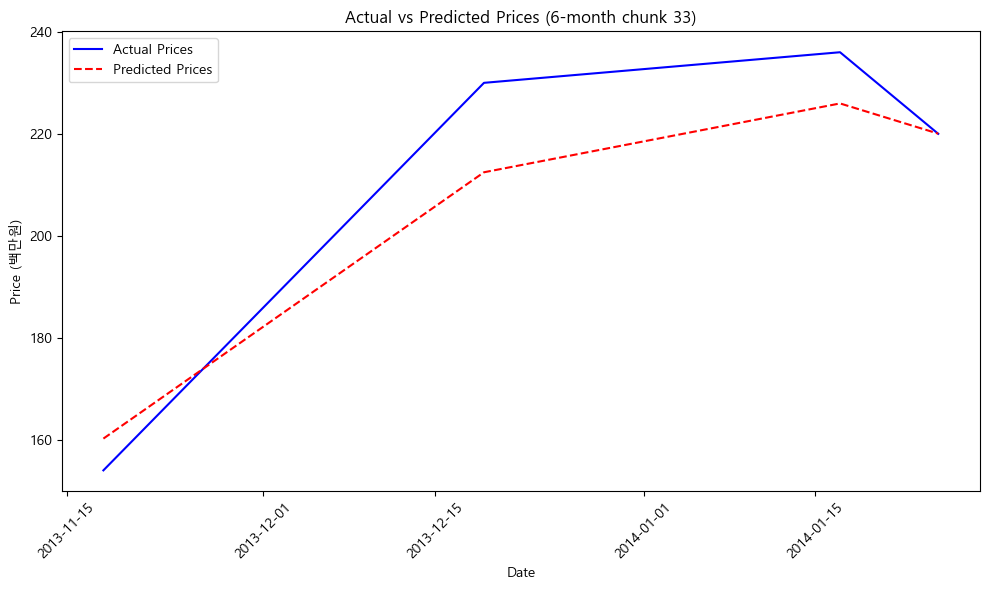

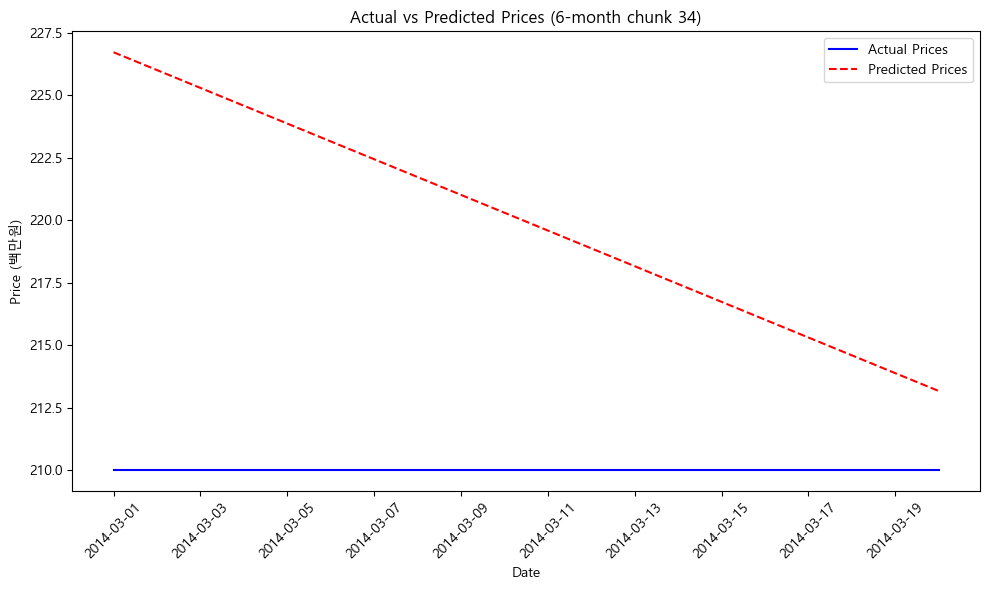

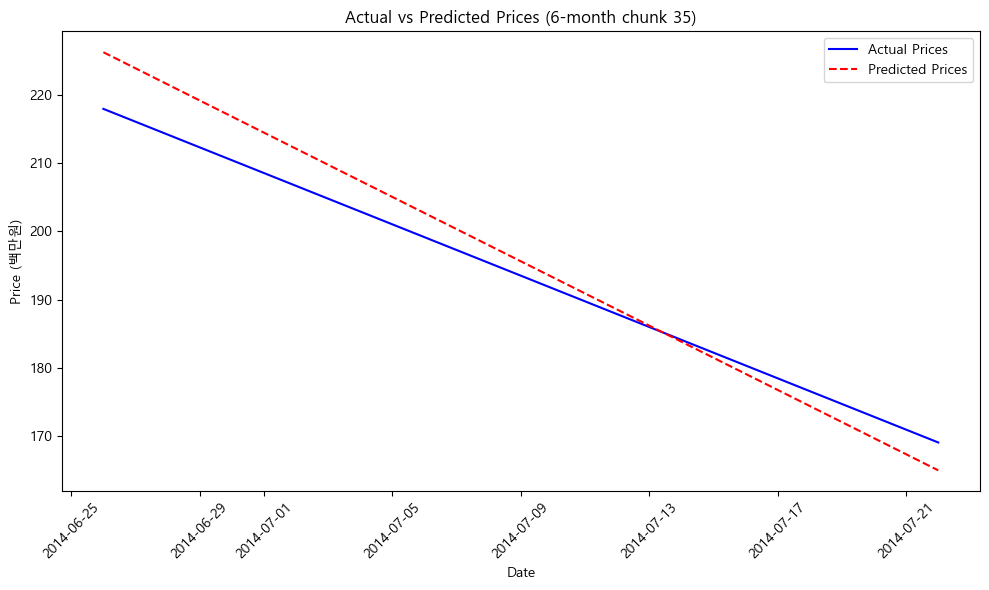

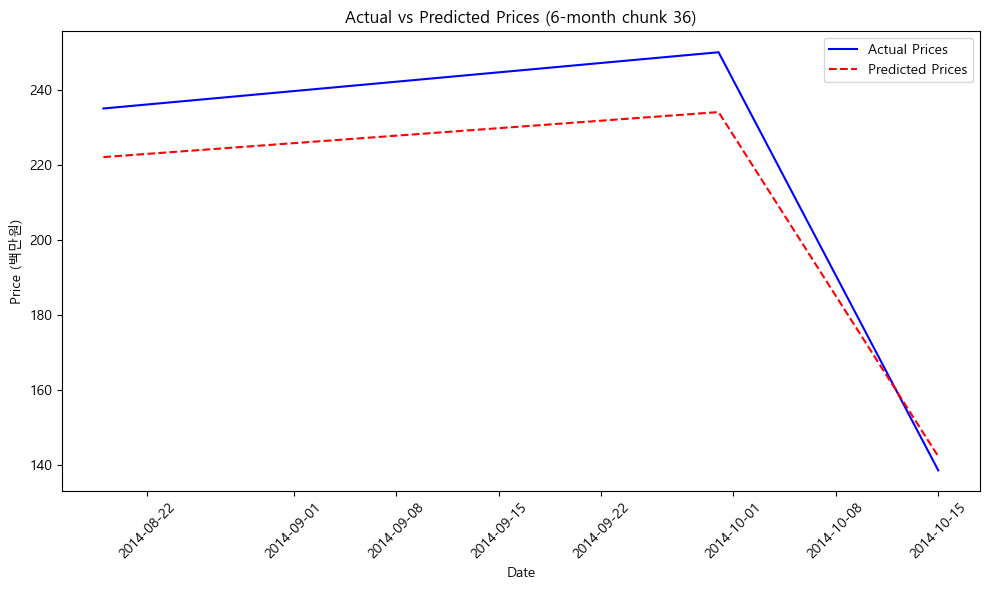

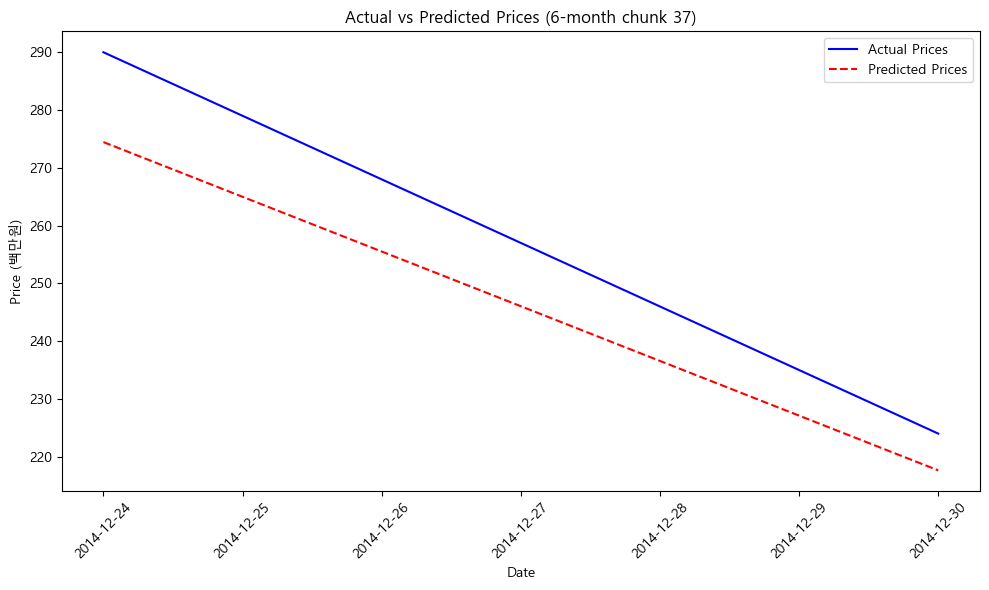

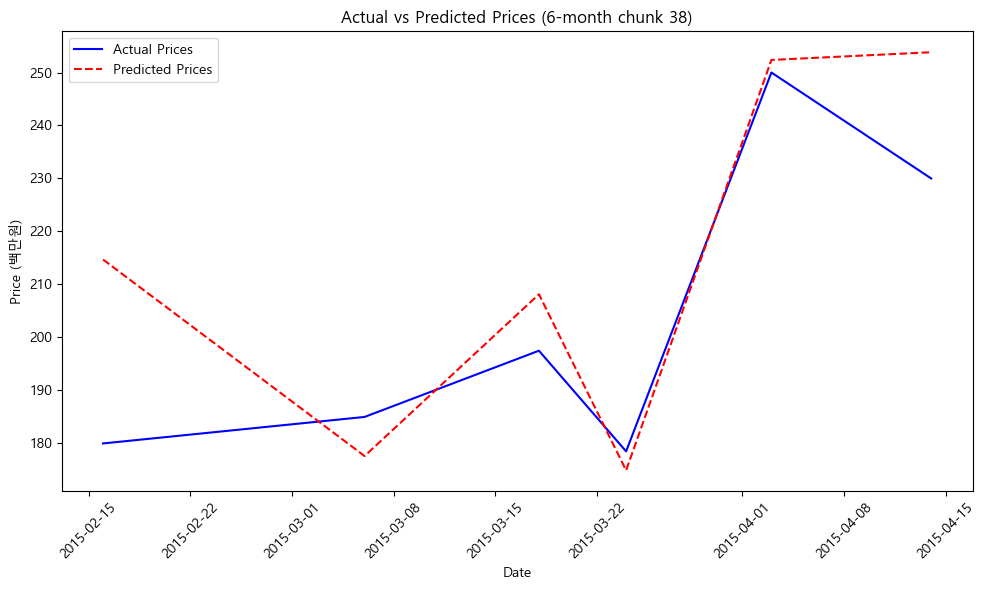

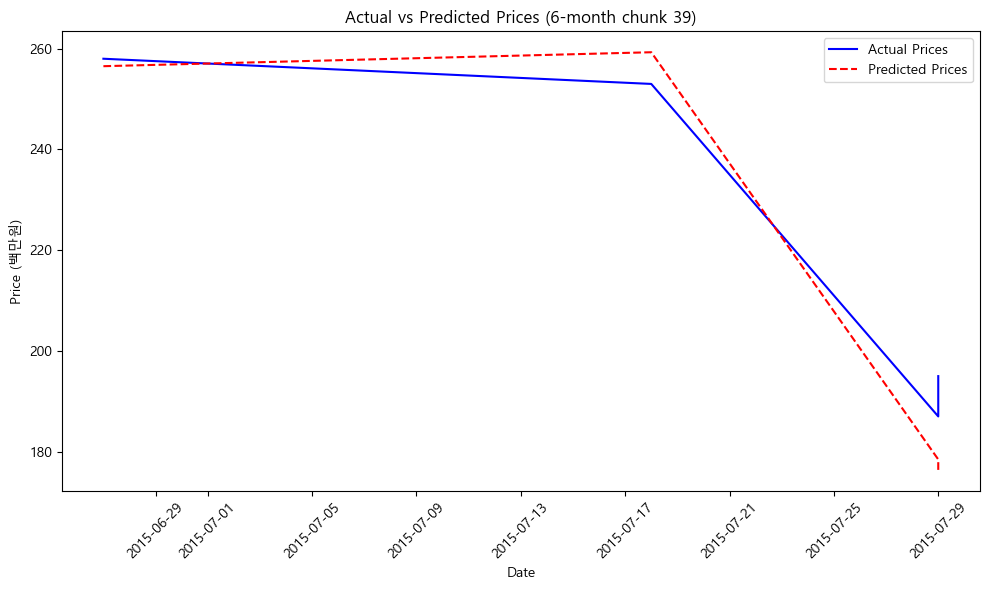

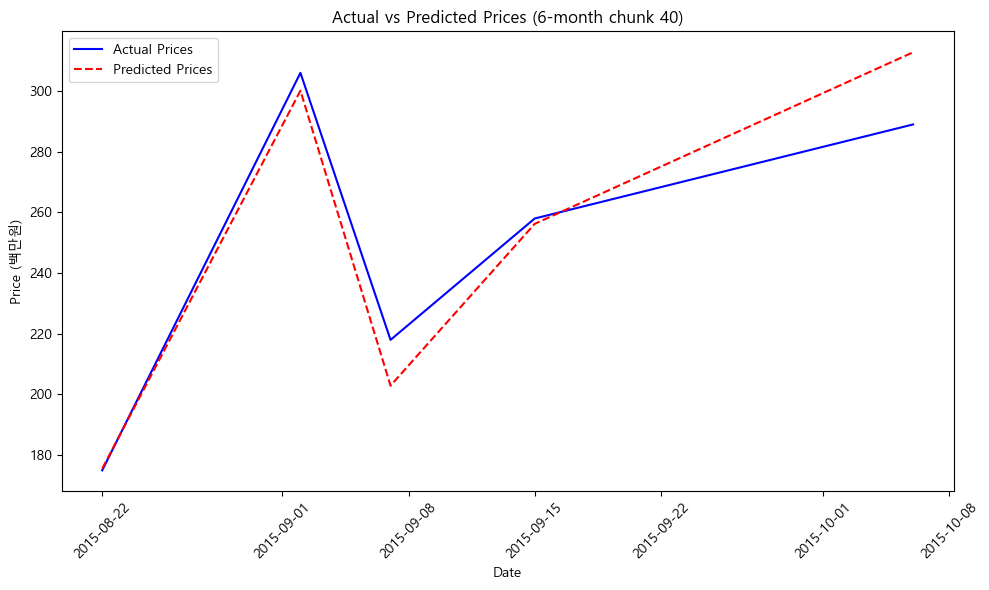

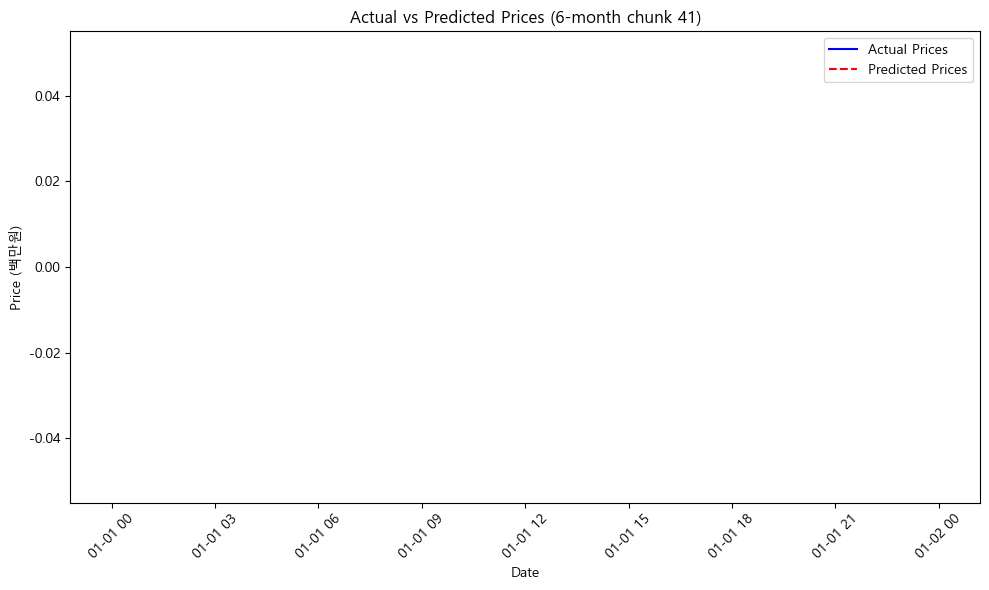

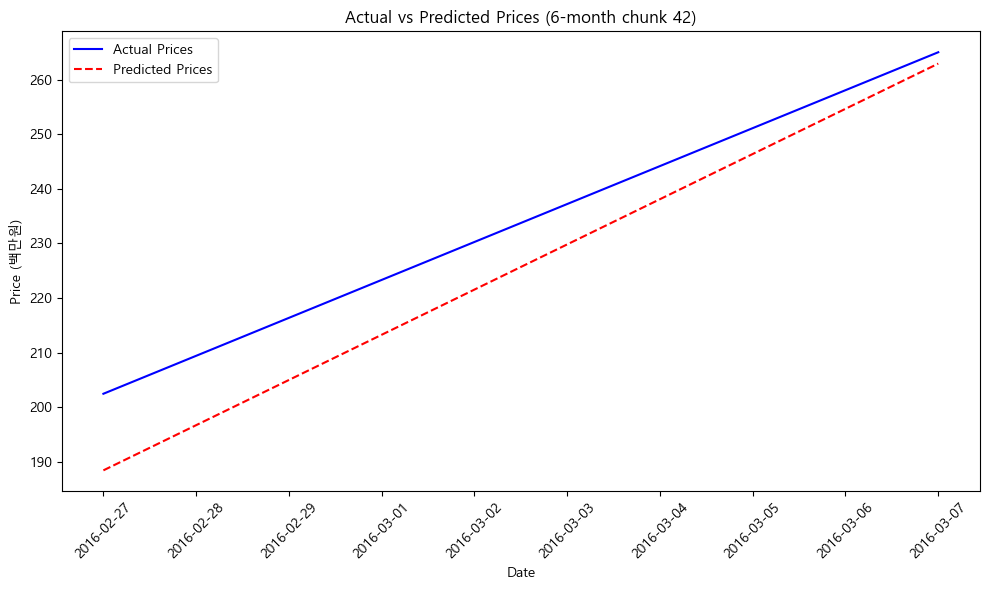

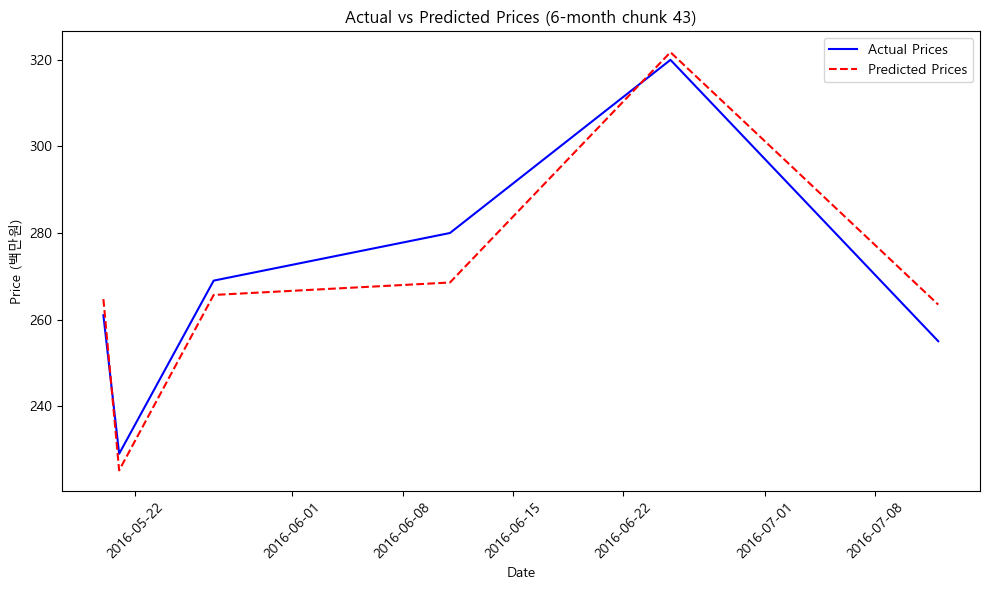

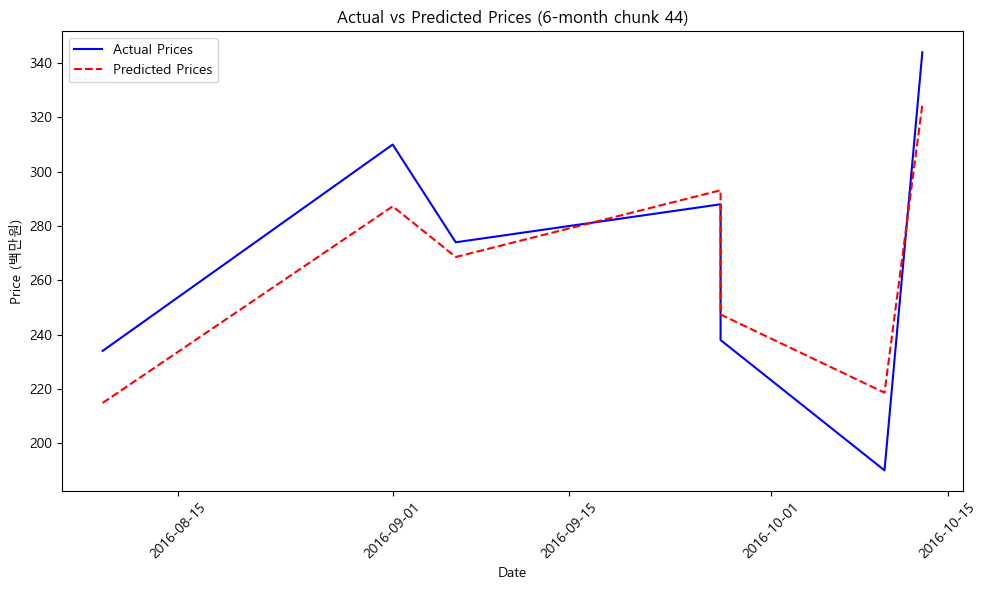

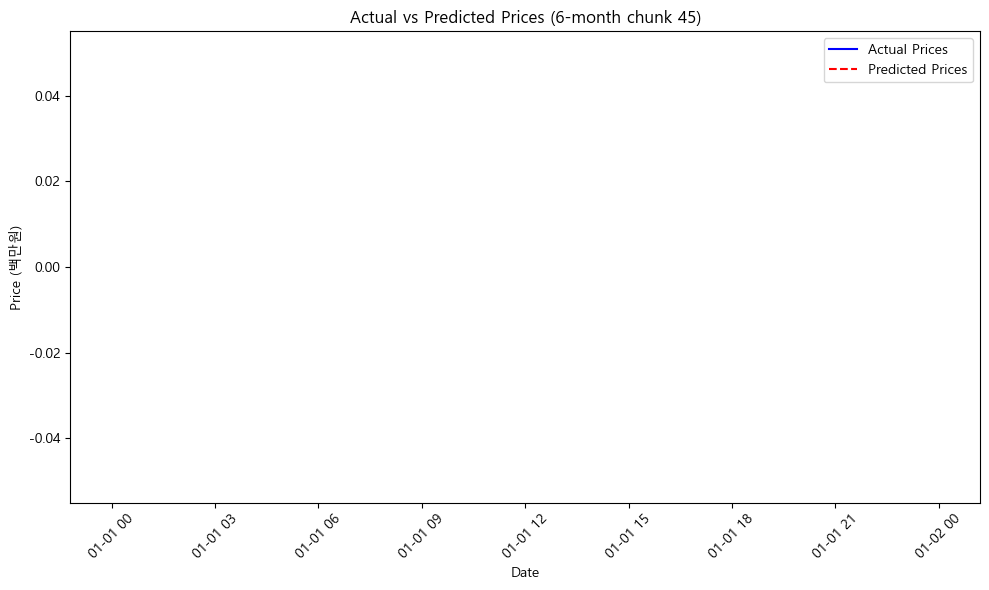

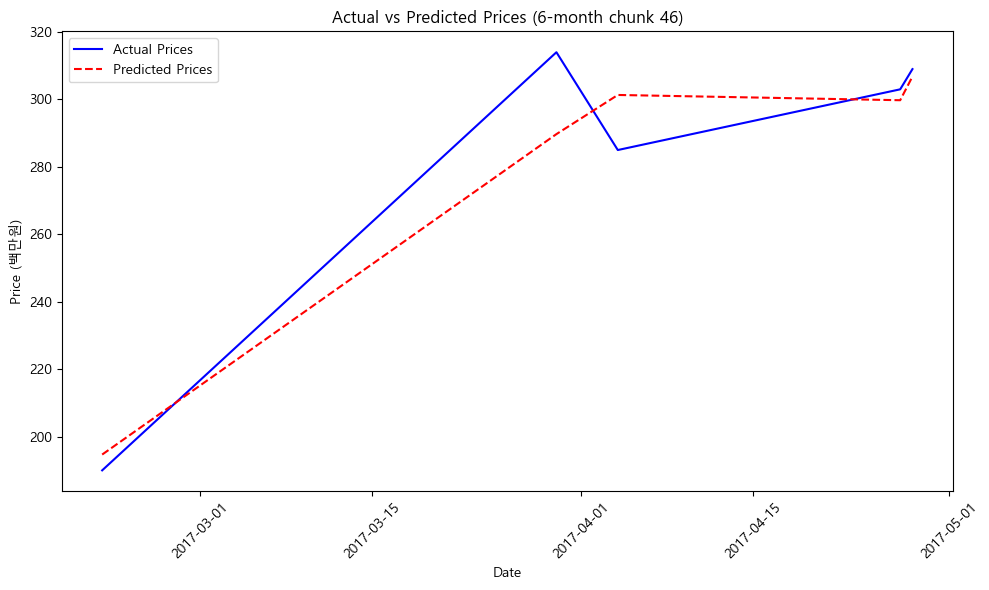

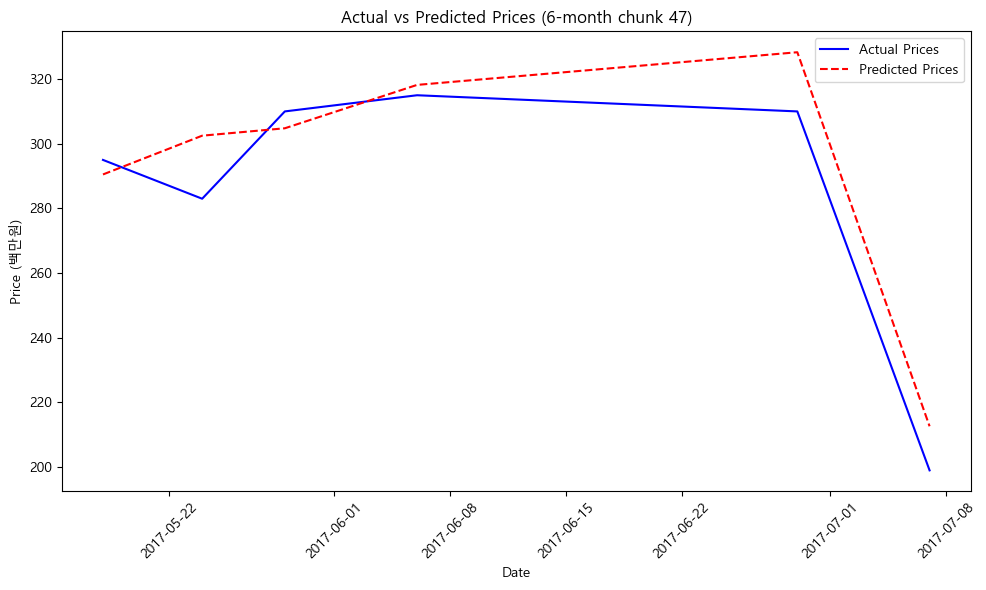

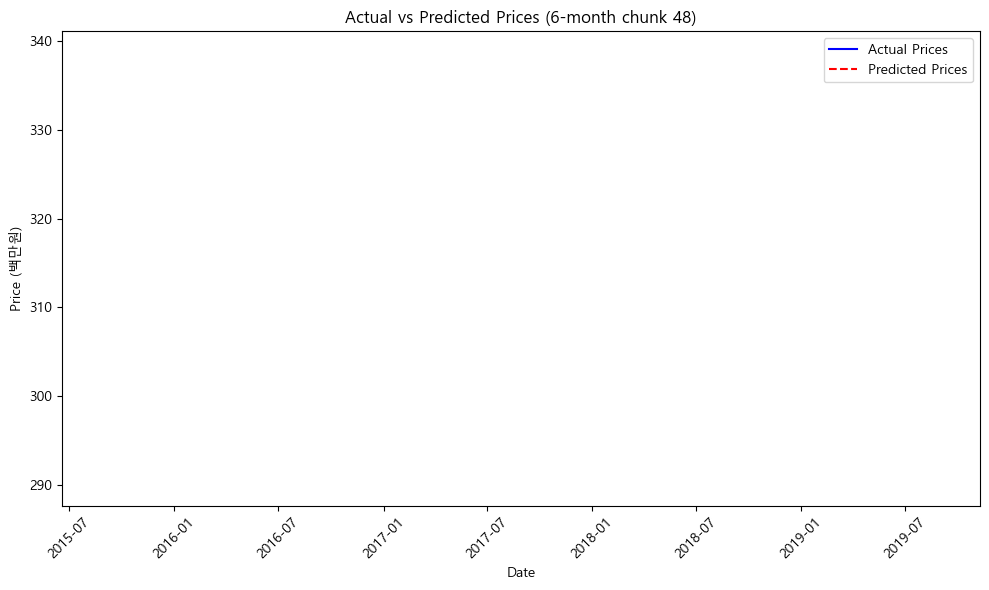

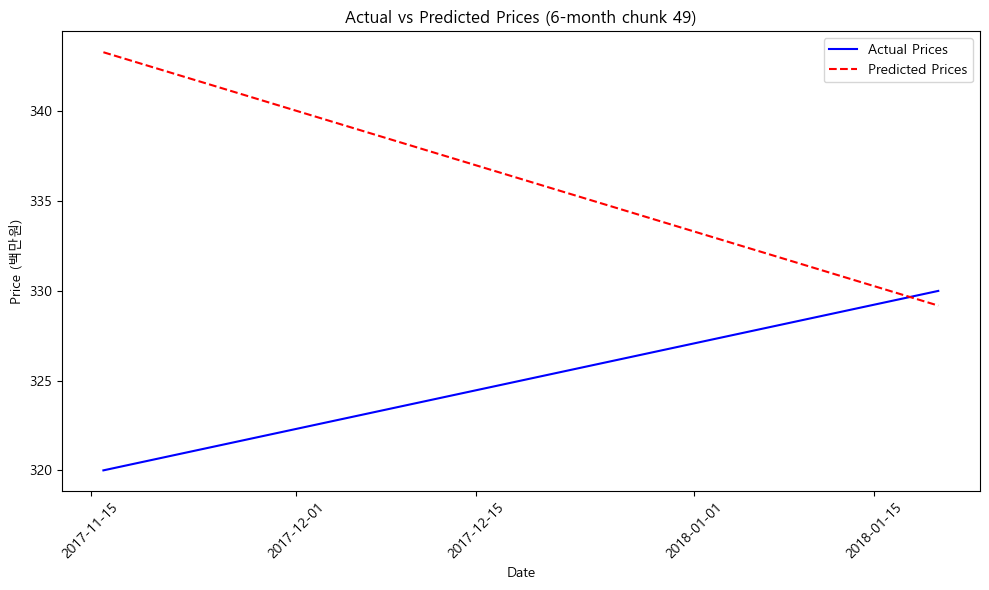

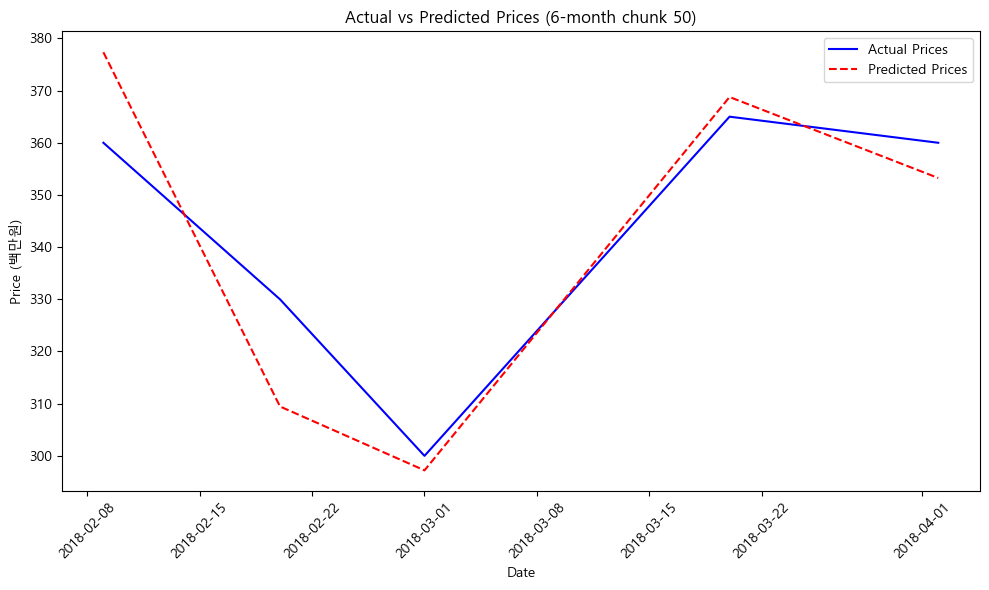

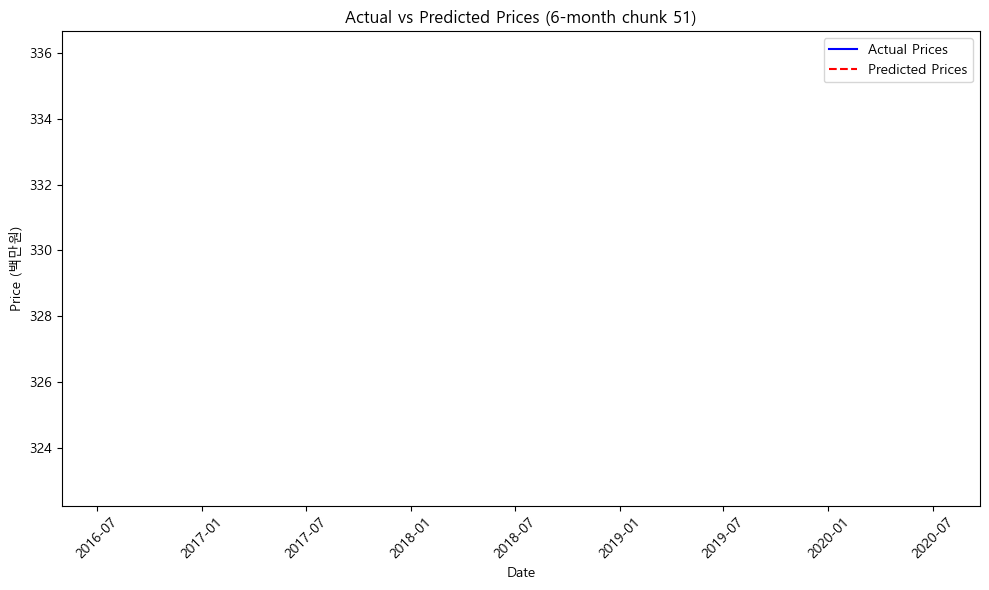

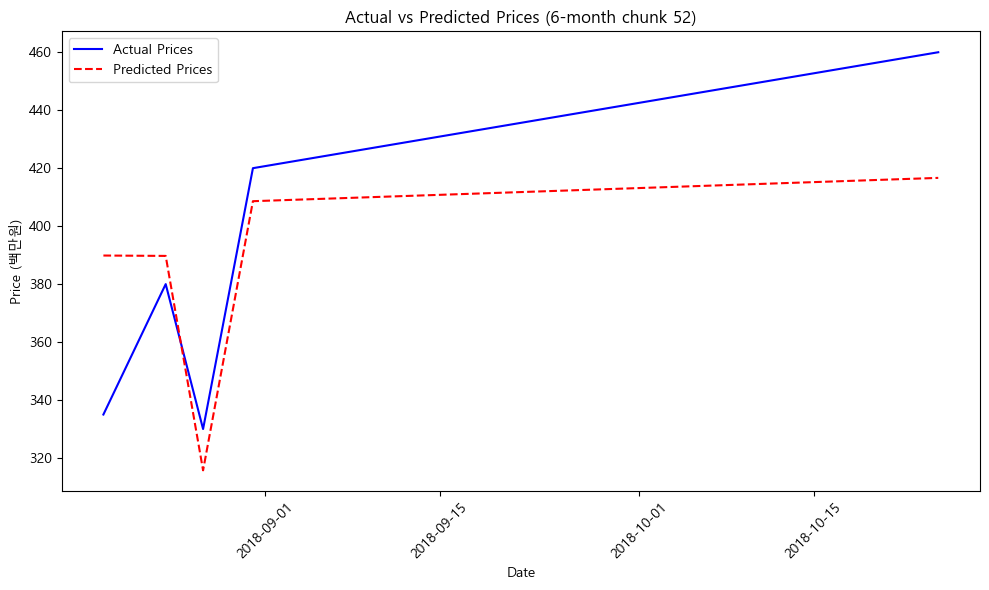

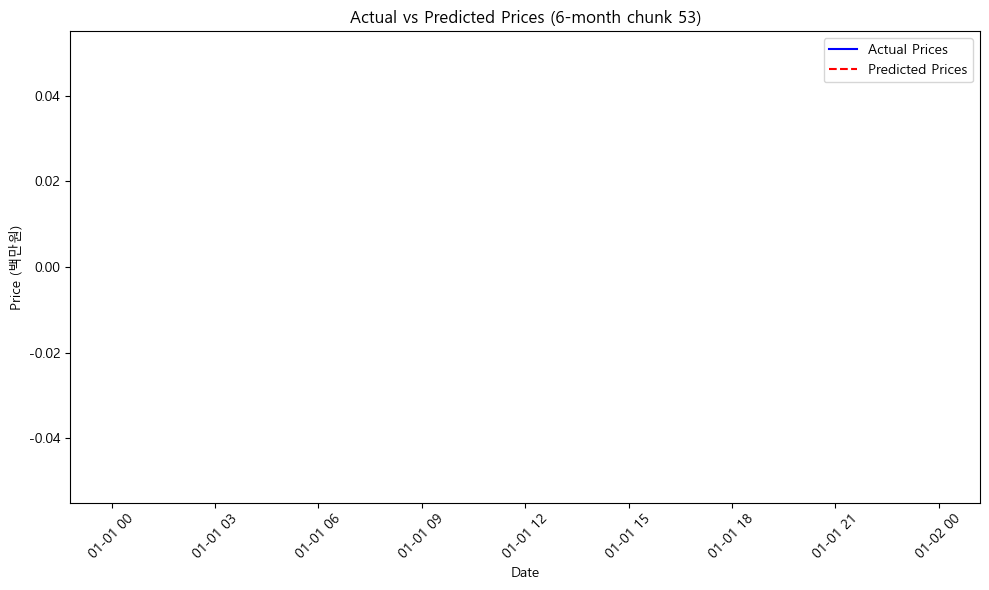

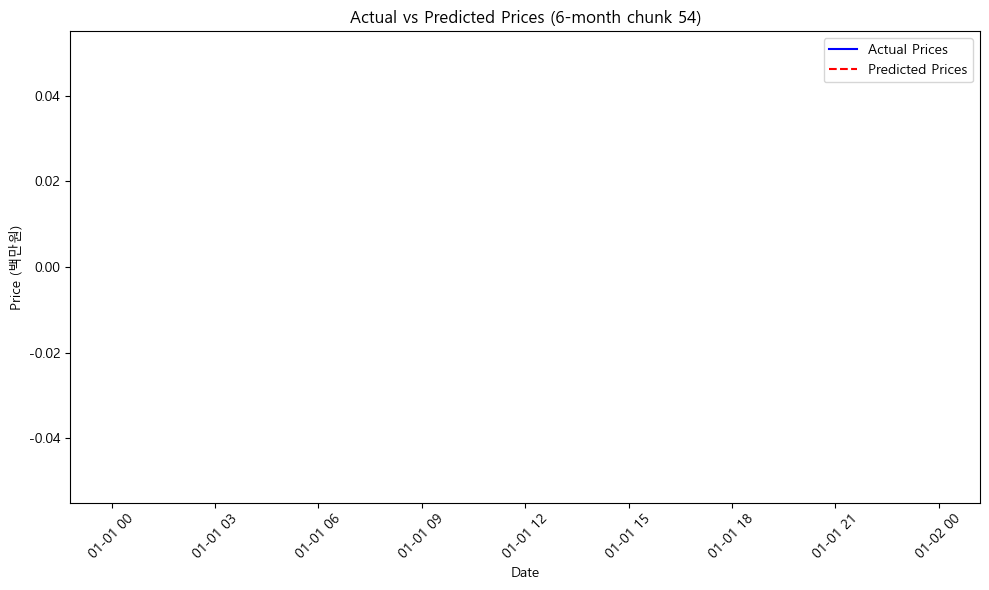

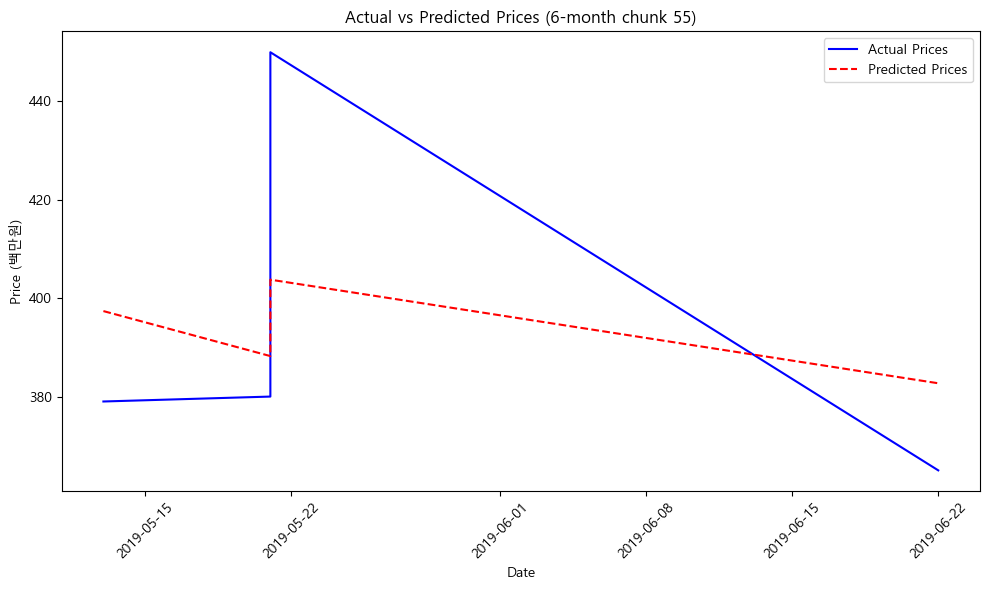

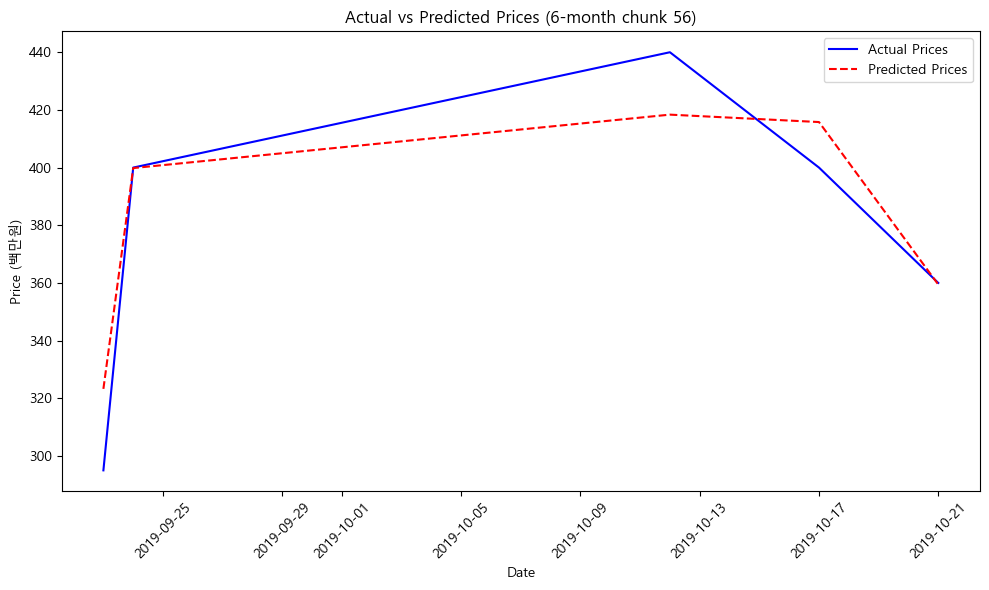

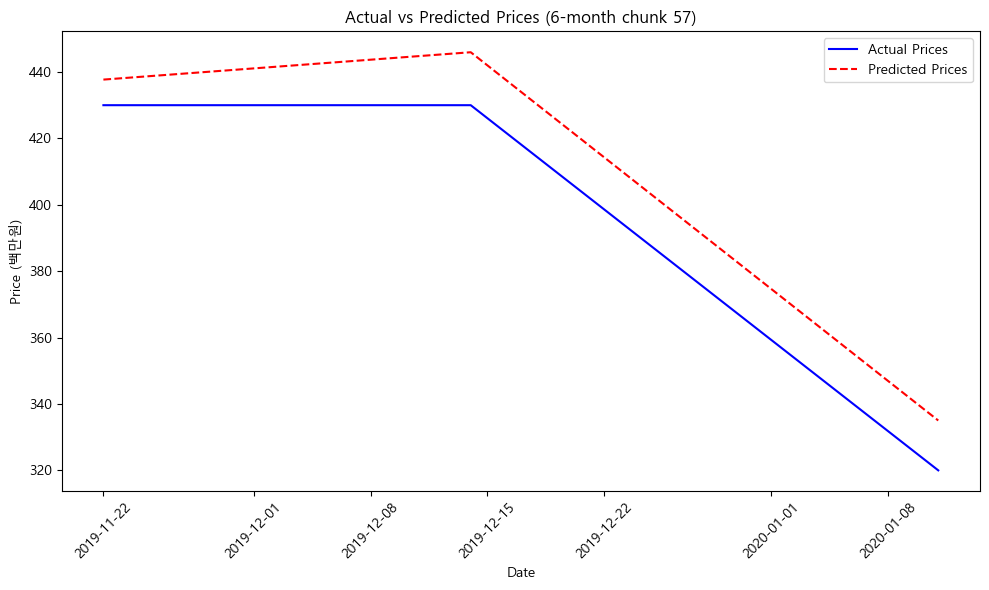

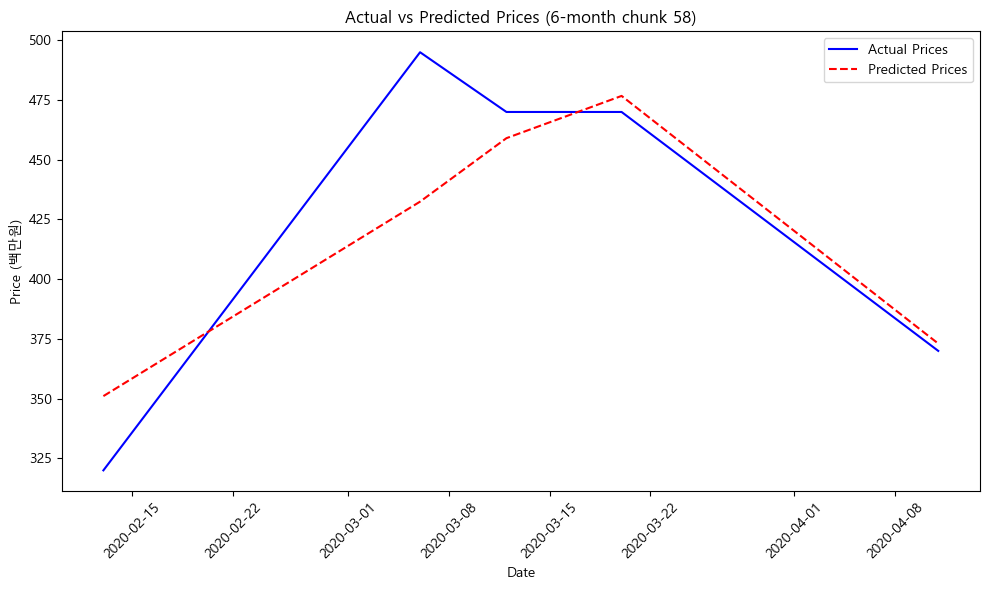

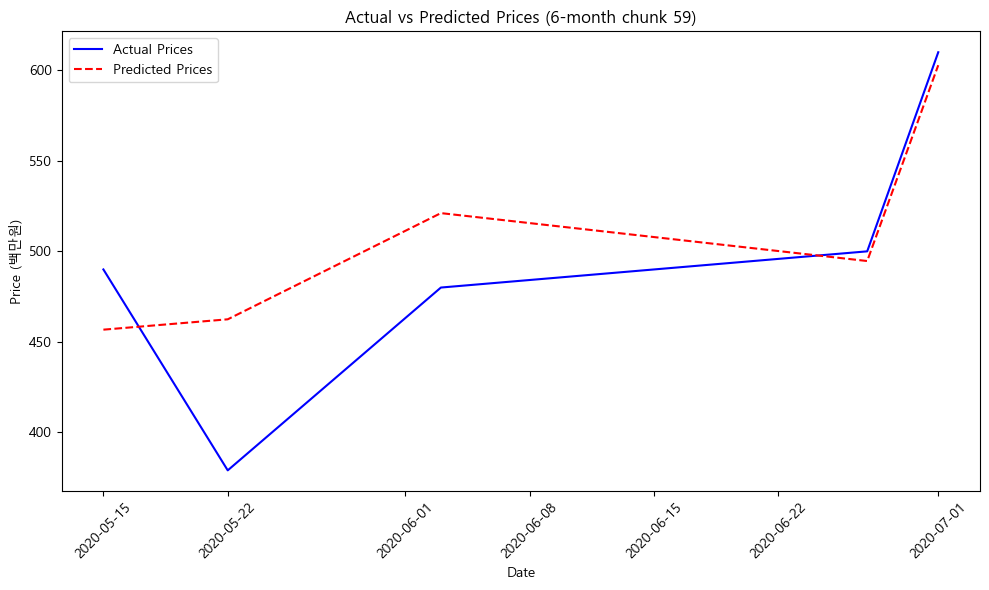

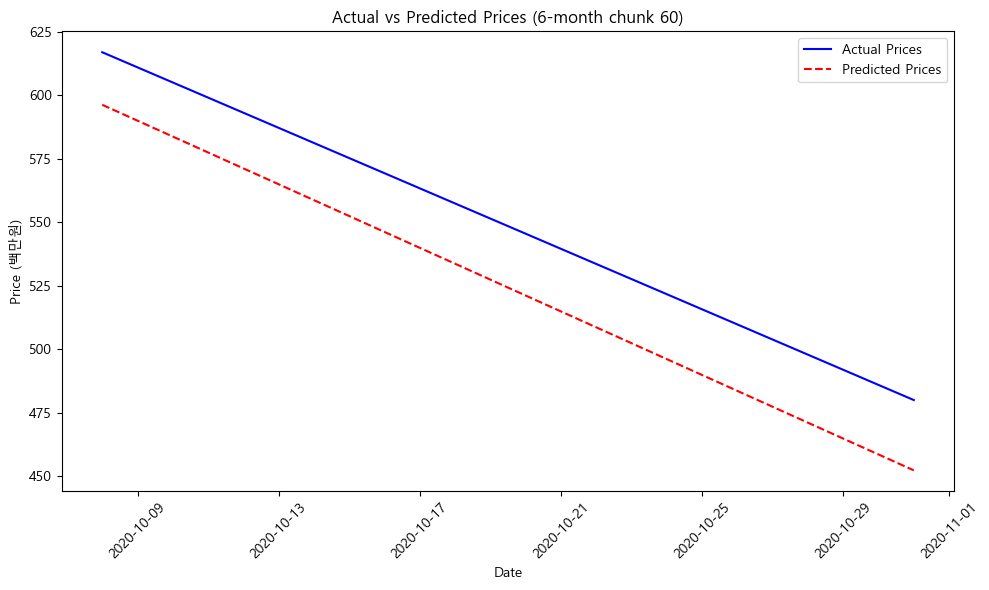

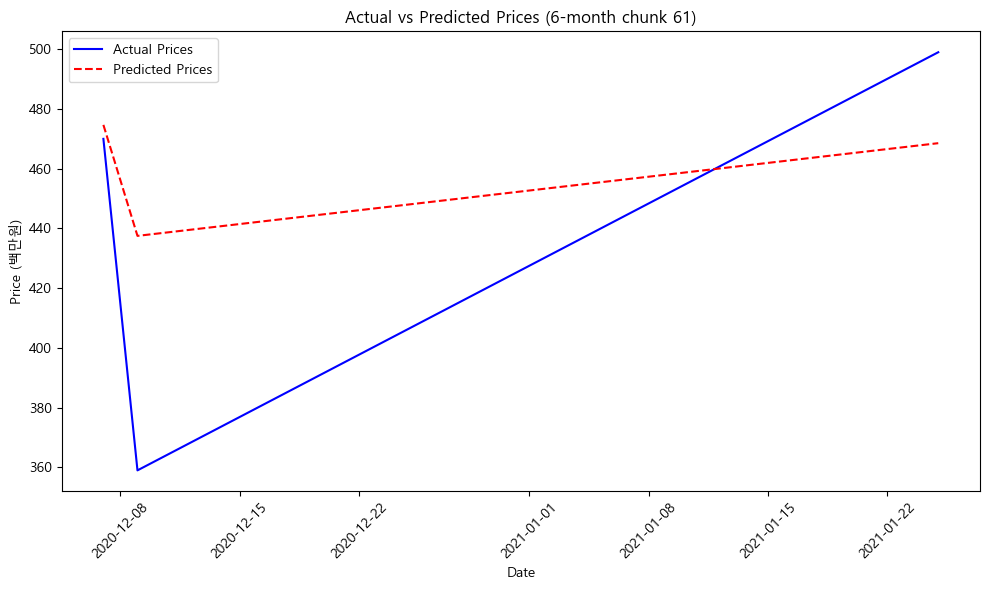

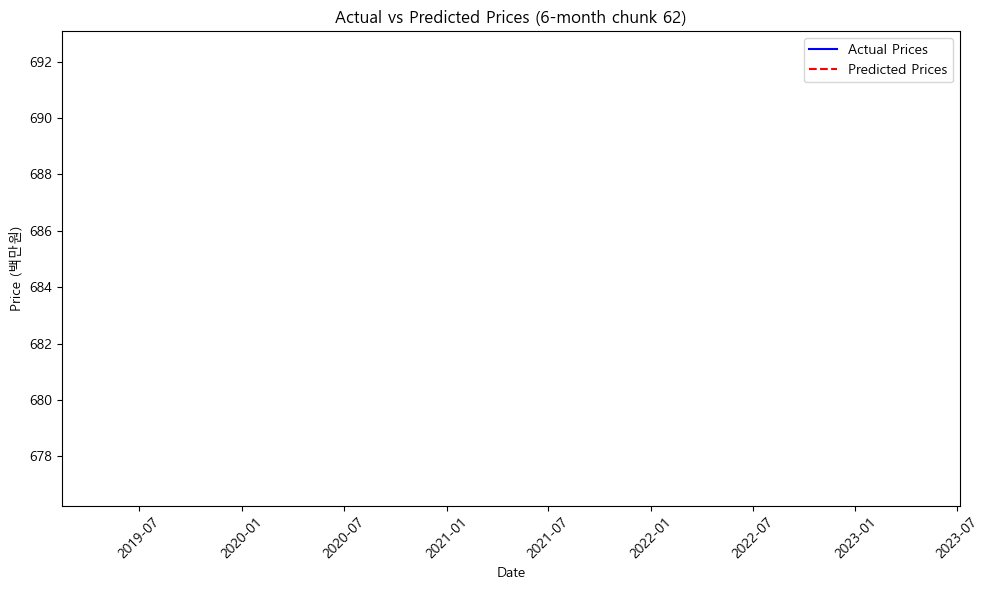

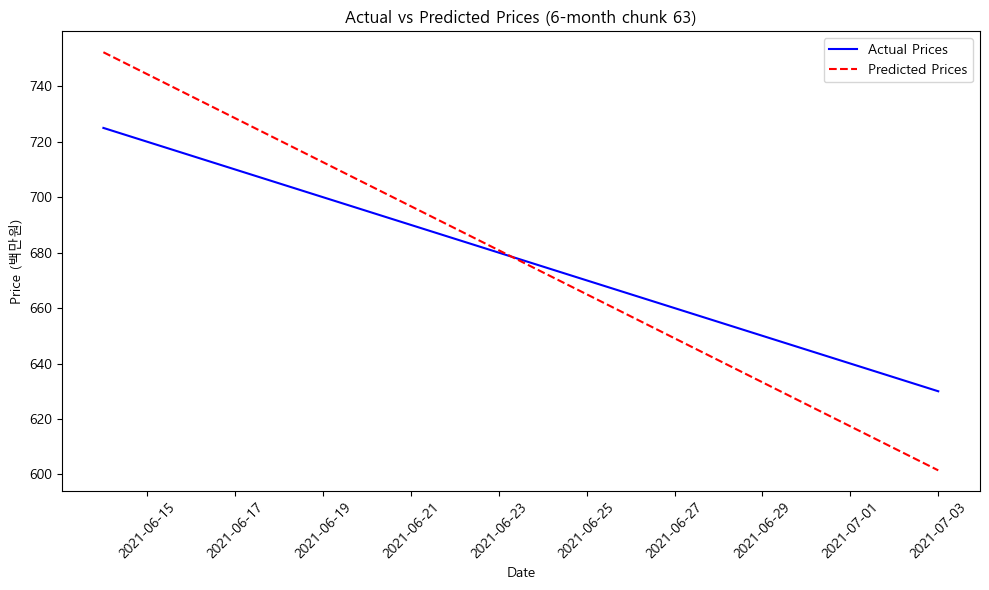

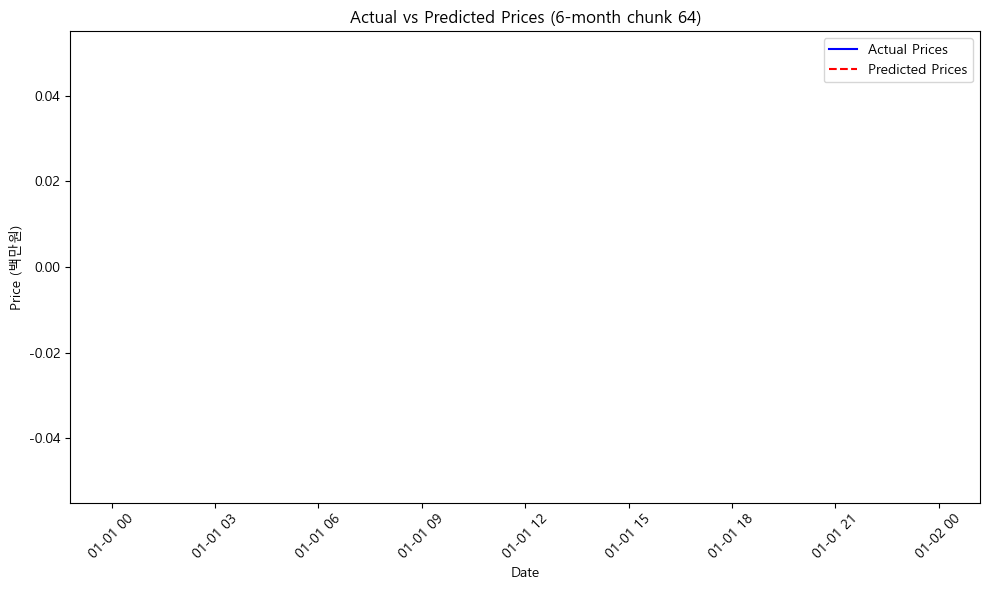

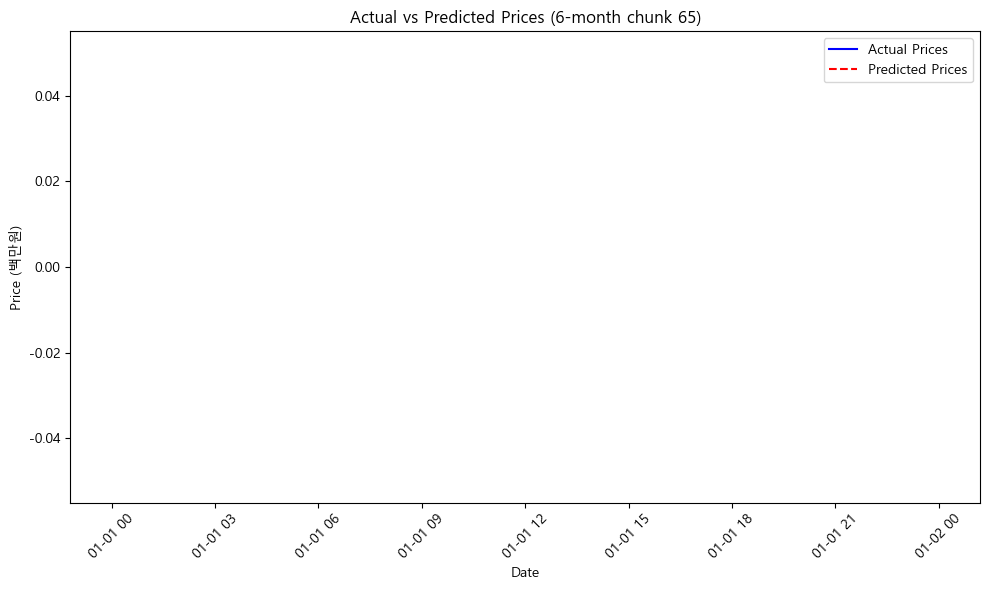

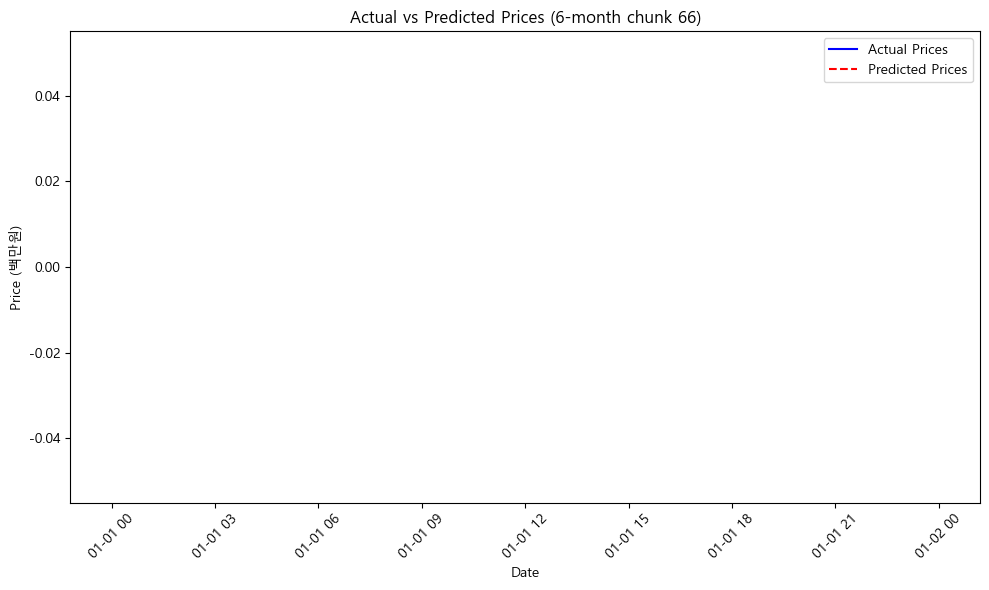

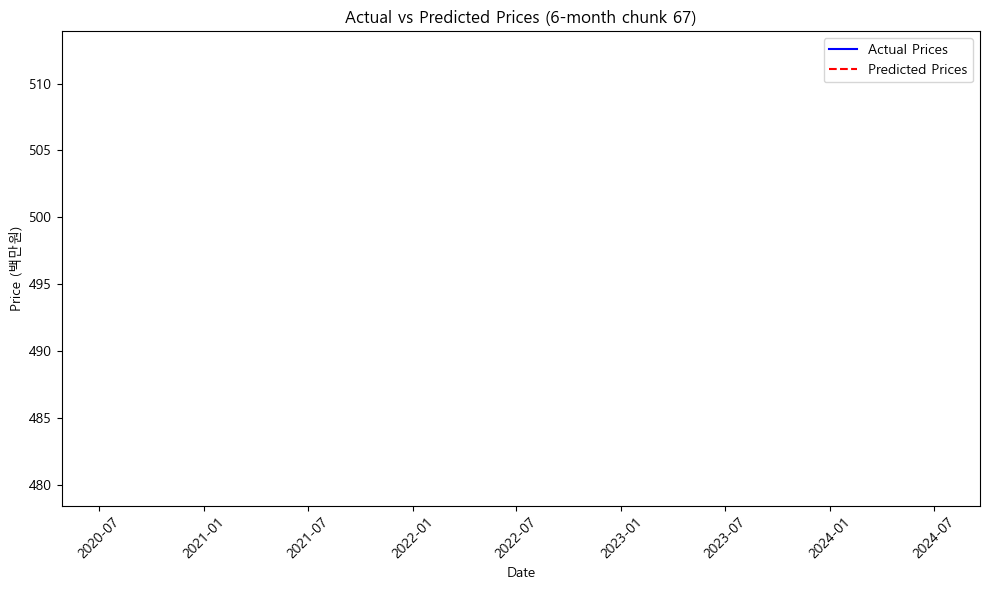

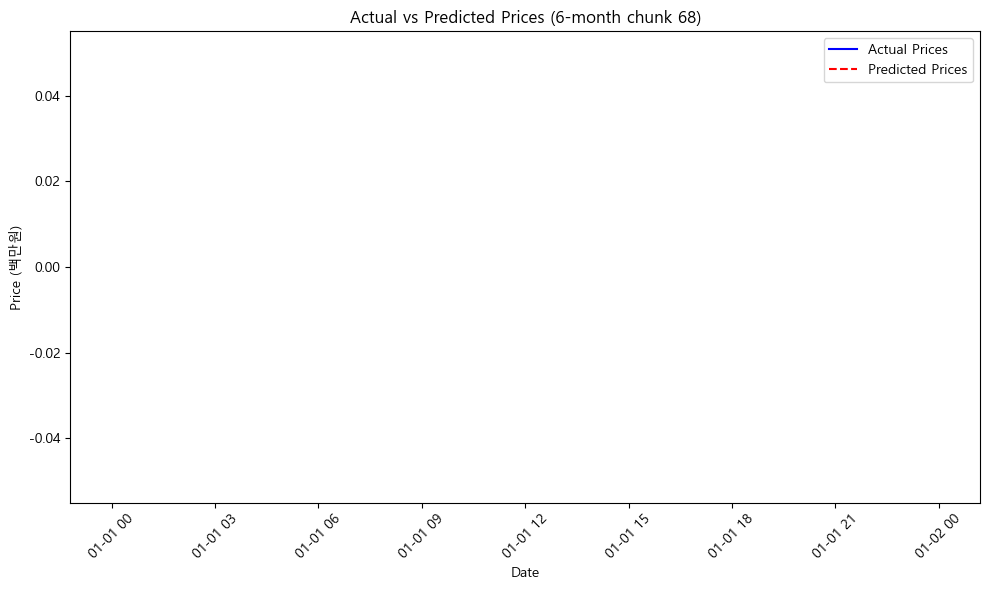

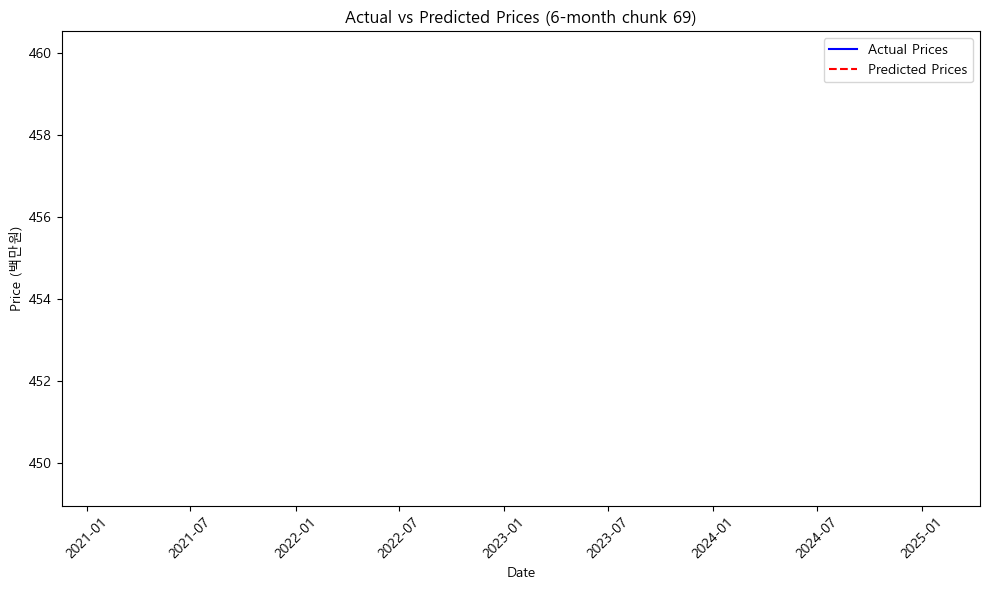

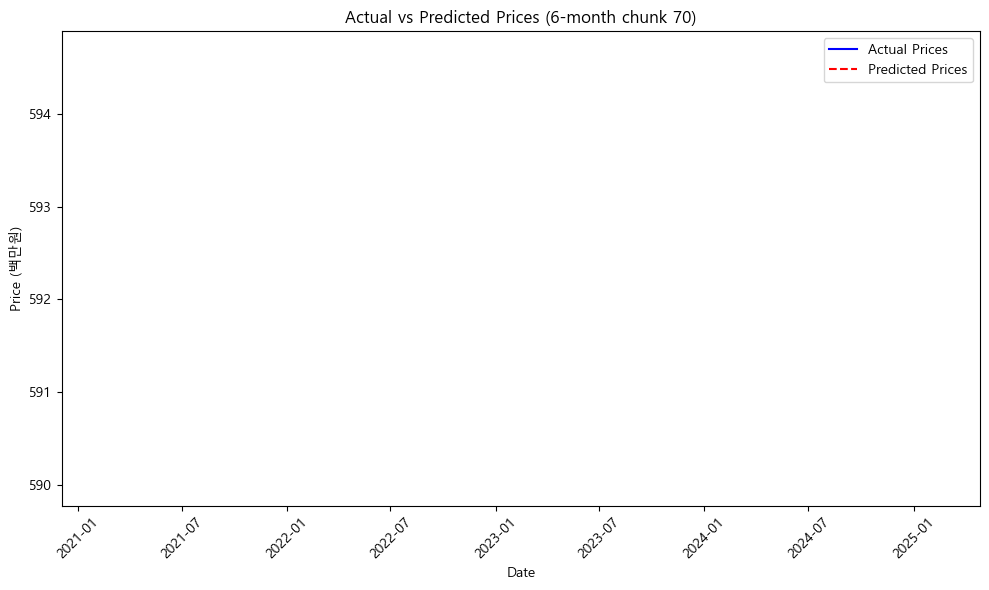

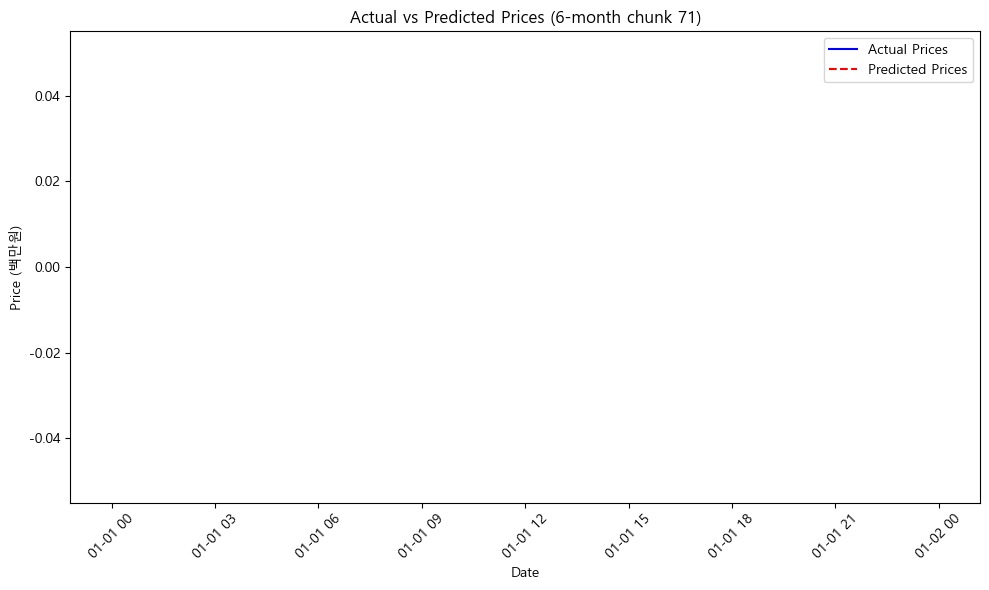

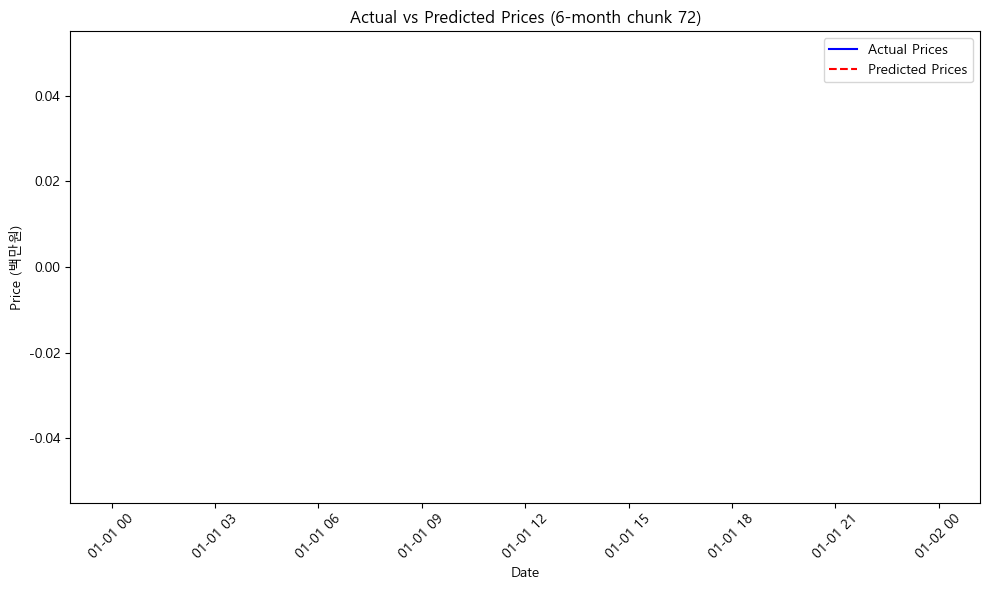

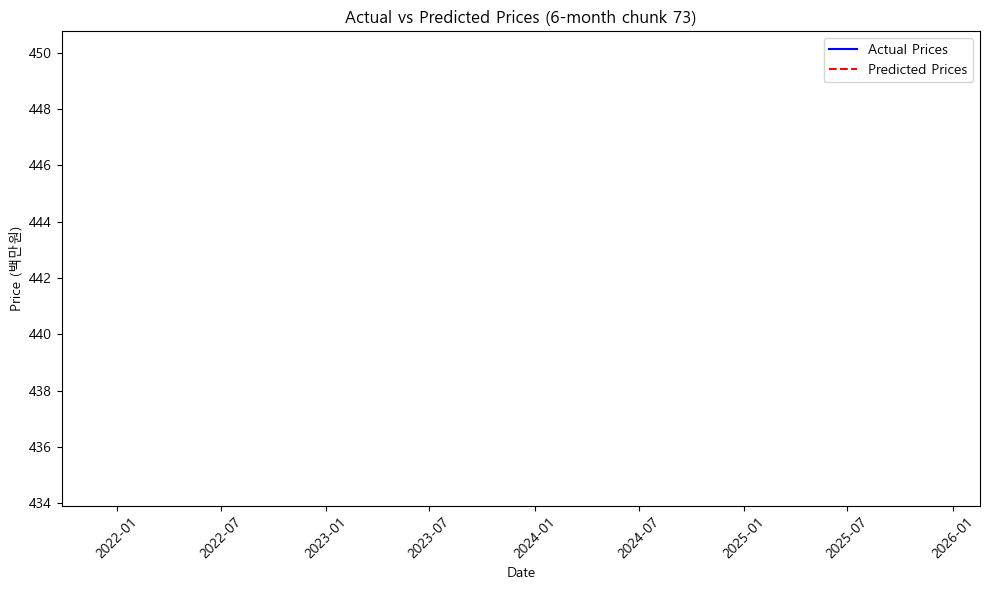

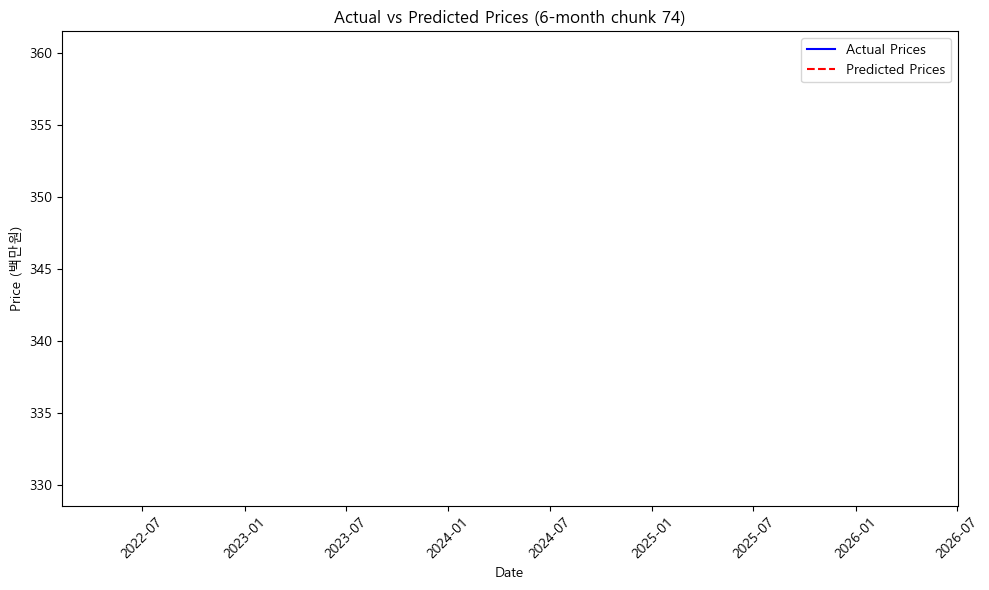

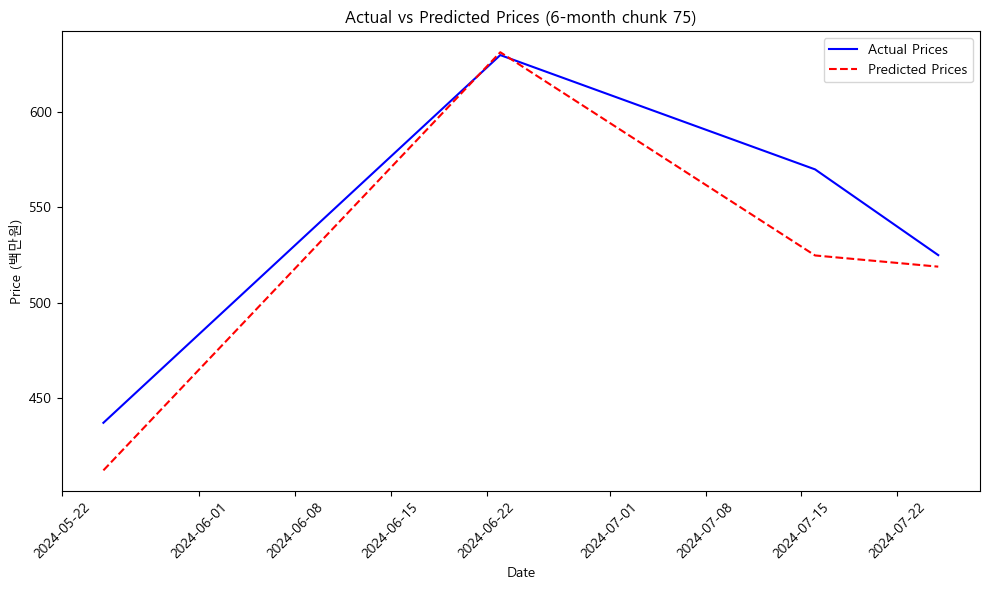

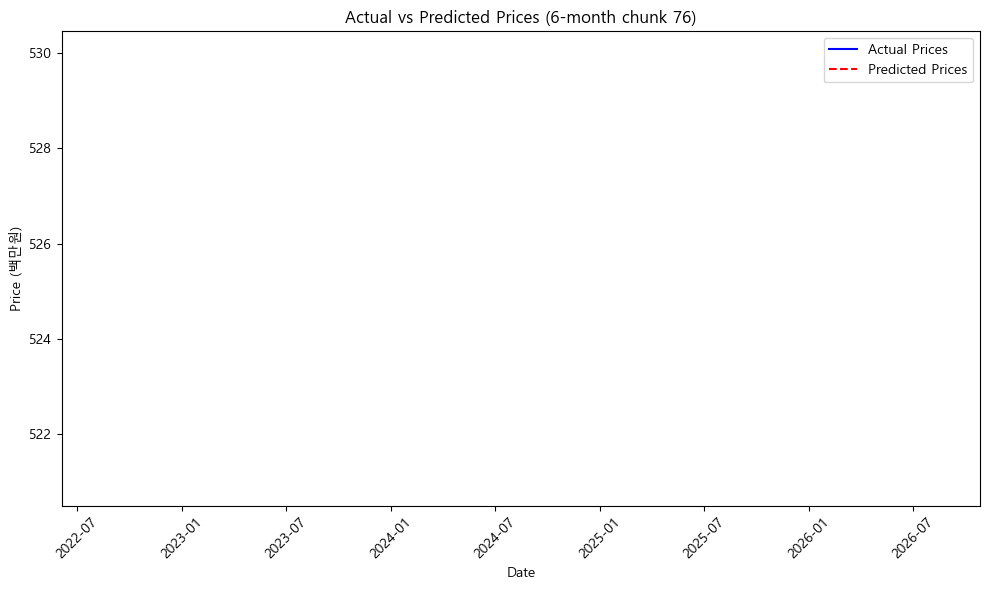

In [9]:
import os
import matplotlib.pyplot as plt

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'NanumGothic' 등으로도 변경 가능
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
'''
# 'result_images' 폴더가 없으면 생성
output_dir = 'result_images_ver2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
'''    
X_test_with_dates = X.loc[X_test.index]  # 원래 인덱스를 사용하여 X_test와 같은 데이터 선택
results = pd.DataFrame({'Date': X_test_with_dates['계약일자'], 'Actual': y_test, 'Predicted': y_pred})

# 정수 값을 날짜로 변환
results['Date'] = convert_days_to_date(results['Date'])

# 6개월 단위로 데이터를 그룹화하여 그래프 그리기
results.set_index('Date', inplace=True)
chunks = results.groupby(pd.Grouper(freq='3M'))

# 각 그룹에 대해 그래프를 그리고 저장하기
for i, (name, chunk) in enumerate(chunks):
    plt.figure(figsize=(10, 6))
    
    # 실제 값 (y_test)
    plt.plot(chunk.index, chunk['Actual'], label='Actual Prices', color='blue')
    
    # 예측 값 (y_pred)
    plt.plot(chunk.index, chunk['Predicted'], label='Predicted Prices', color='red', linestyle='--')
    
    # 그래프 꾸미기
    plt.xlabel('Date')
    plt.ylabel('Price (백만원)')
    plt.title(f'Actual vs Predicted Prices (6-month chunk {i+1})')
    plt.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 연도와 월 구간을 기반으로 파일 이름 설정
    year = name.year
    if name.month == 1:
        month = 'first'
    if name.month == 2:
        month = 'second'
    if name.month == 3:
        month = 'third'
    if name.month == 4:
        month = 'fourth'
    '''
    # 파일 이름에 맞게 'result_images' 폴더에 저장
    file_name = os.path.join(output_dir, f'{year}_{month}_predict_graph.png')
    plt.savefig(file_name)
    '''
    # 그래프 출력
    plt.show()


In [10]:
# Select random 10 samples from the test set
random_samples = X_test.sample(n=10, random_state=4)

# Predict the values
predictions = model.predict(random_samples)

# Prepare the output with actual and predicted values
actual_values = y_test.loc[random_samples.index]

# Combine them into a dataframe for comparison
comparison_df = pd.DataFrame({'Actual Value': actual_values, 'Predicted Value': predictions})

comparison_df

Actual Value  Predicted Value
860          258.0         256.2350
234          400.0         399.8320
858          269.0         265.6900
402          450.0         403.7650
284          295.0         323.2600
566          360.0         353.2500
261          430.0         445.9500
1258         160.0         159.2909
996          138.5         142.2200
1163         172.5         165.1900

In [11]:
# 날짜 범위 설정
start_date = '2006-01-15'
end_date = '2024-10-15'

# 매달 15일 날짜 생성
date_range = pd.date_range(start=start_date, end=end_date, freq='M') + pd.Timedelta(days=15)
# DataFrame 생성
date_df = pd.DataFrame(date_range, columns=['Date'])

# 'Date' 열을 '계약년월' 형식으로 변환
date_df['계약년월'] = date_df['Date'].dt.strftime('%Y%m')

# 출력
print(date_df)

          Date    계약년월
0   2006-02-15  200602
1   2006-03-15  200603
2   2006-04-15  200604
3   2006-05-15  200605
4   2006-06-15  200606
..         ...     ...
220 2024-06-15  202406
221 2024-07-15  202407
222 2024-08-15  202408
223 2024-09-15  202409
224 2024-10-15  202410

[225 rows x 2 columns]


In [12]:
# 전용면적 X에 해당하는 값 설정
X_value = 41.30

# 전용면적 X에 해당하는 실거래 데이터 필터링
filtered_df = df[df['전용면적'] == X_value]

# 날짜 차이를 일 수로 계산
prediction_dates_days = (date_df['Date'] - pd.to_datetime('2006-01-01')).dt.days

# 전용면적 X와 해당 날짜에 대한 예측 입력값 생성
X_imagin = pd.DataFrame({
    '계약일자': prediction_dates_days,
    '전용면적': X_value,
    '층': filtered_df['층'].median()  # 층을 중간값으로 설정 (다른 방식도 가능)
})

# 모델을 사용해 예측
y_imagin = model.predict(X_imagin)

In [17]:
# '계약일자'를 기준으로 오름차순 정렬
filtered_df = filtered_df.sort_values(by='계약일자', ascending=True)

# pandas의 설정 변경: 모든 행과 열을 출력할 수 있도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 정렬된 결과 출력
filtered_df

NO            시군구   번지   본번  부번        단지명  전용면적(㎡)    계약년월 계약일  \
1845   52  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200601  17   
1875   82  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200602  10   
1871   78  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200602  21   
1843   50  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200602  21   
1867   74  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200603  04   
1840   47  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200603  18   
1873   80  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200603  20   
1869   76  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200603  21   
1844   51  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200603  23   
1849   56  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200604  07   
1836   43  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200605  15   
1837   44  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200605  22   
1848   55  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200605  30   
1762  195  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200606  03   
1681  114  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200606  07   
1778  211  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200606  09   
1770  203  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200606  28   
1759  192  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200607  15   
1744  177  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200607  28   
1752  185  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200608  02   
1668  101  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200608  14   
1661   94  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200608  17   
1672  105  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  11   
1683  116  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  11   
1651   84  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  13   
1756  189  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  18   
1686  119  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  22   
1645   78  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  23   
1760  193  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  25   
1675  108  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200609  28   
1647   80  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  02   
1748  181  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  04   
1775  208  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  11   
1679  112  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  14   
1757  190  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  18   
1780  213  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  24   
1741  174  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200610  28   
1740  173  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  01   
1693  126  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  02   
1745  178  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  03   
1788  221  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  04   
1678  111  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  06   
1694  127  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  07   
1785  218  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  09   
1769  202  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  11   
1783  216  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  13   
1671  104  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  14   
1765  198  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  14   
1690  123  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  15   
1688  121  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  17   
1658   91  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  18   
1674  107  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  19   
1655   88  서울특별시 노원구 상계동  765  765   0  상계주공1(고층)     41.3  200611  20   
1771  204  

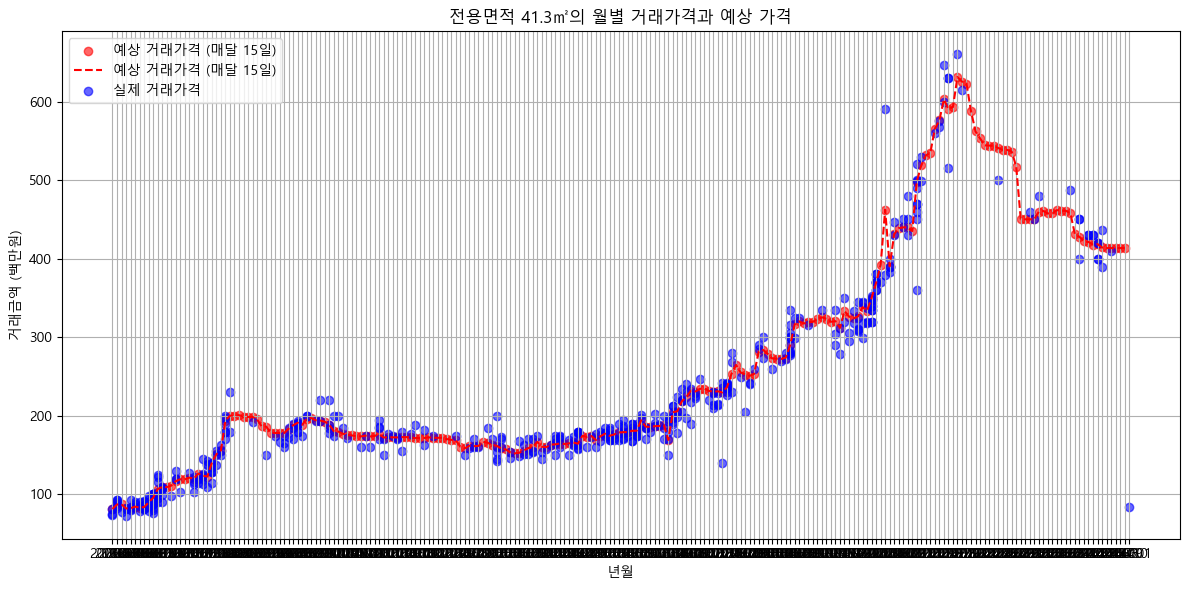

In [18]:
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 예측된 값을 점으로 표시
plt.scatter(date_df['계약년월'], y_imagin, color='red', label='예상 거래가격 (매달 15일)', alpha=0.6)
# 예측된 값을 선 그래프로 표시
plt.plot(date_df['계약년월'], y_imagin, color='red', label='예상 거래가격 (매달 15일)', linestyle='--')

# 실거래 데이터를 점으로 표시
plt.scatter(filtered_df['계약년월'], filtered_df['거래금액(백만원)'], color='blue', label='실제 거래가격', alpha=0.6)


# 그래프 설정
plt.title(f'전용면적 {X_value}㎡의 월별 거래가격과 예상 가격')
plt.xlabel('년월')
plt.ylabel('거래금액 (백만원)')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

In [21]:
# 두 데이터프레임 열 방향으로 합치기 (열 그대로 이어붙이기)
imagin_df = pd.concat([date_df, pd.DataFrame({'가격(백만원)': y_imagin})], axis=1)
imagin_df

Date    계약년월     가격(백만원)
0   2006-02-15  200602   81.512000
1   2006-03-15  200603   87.242000
2   2006-04-15  200604   87.440000
3   2006-05-15  200605   82.150000
4   2006-06-15  200606   82.500000
5   2006-07-15  200607   84.466000
6   2006-08-15  200608   83.257000
7   2006-09-15  200609   83.885000
8   2006-10-15  200610   89.795000
9   2006-11-15  200611   95.764000
10  2006-12-15  200612  106.745000
11  2007-01-15  200701  109.580000
12  2007-02-15  200702  109.316000
13  2007-03-15  200703  111.165000
14  2007-04-15  200704  116.791000
15  2007-05-15  200705  119.305000
16  2007-06-15  200706  119.135000
17  2007-07-15  200707  121.442000
18  2007-08-15  200708  119.903000
19  2007-09-15  200709  126.650000
20  2007-10-15  200710  123.796000
21  2007-11-15  200711  122.762000
22  2007-12-15  200712  140.550000
23  2008-01-15  200801  151.160000
24  2008-02-15  200802  155.990000
25  2008-03-15  200803  194.000000
26  2008-04-15  200804  200.270000
27  2008-05-15  200805  200.270000
28  2008-06-15  200806  200.910000
29  2008-07-15  200807  198.650000
30  2008-08-15  200808  198.650000
31  2008-09-15  200809  198.650000
32  2008-10-15  200810  195.440000
33  2008-11-15  200811  186.670000
34  2008-12-15  200812  186.450000
35  2009-01-15  200901  178.490000
36  2009-02-15  200902  178.220000
37  2009-03-15  200903  178.220000
38  2009-04-15  200904  178.180000
39  2009-05-15  200905  183.770000
40  2009-06-15  200906  188.060000
41  2009-07-15  200907  191.270000
42  2009-08-15  200908  188.680000
43  2009-09-15  200909  196.420000
44  2009-10-15  200910  197.160000
45  2009-11-15  200911  194.390000
46  2009-12-15  200912  194.045000
47  2010-01-15  201001  192.490000
48  2010-02-15  201002  188.680000
49  2010-03-15  201003  180.340000
50  2010-04-15  201004  179.980000
51  2010-05-15  201005  177.309900
52  2010-06-15  201006  175.589900
53  2010-07-15  201007  175.049800
54  2010-08-15  201008  174.174800
55  2010-09-15  201009  173.899400
56  2010-10-15  201010  174.799400
57  2010-11-15  201011  173.793700
58  2010-12-15  201012  174.344200
59  2011-01-15  201101  176.885000
60  2011-02-15  201102  172.400000
61  2011-03-15  201103  172.880000
62  2011-04-15  201104  172.660000
63  2011-05-15  201105  172.560000
64  2011-06-15  201106  172.940000
65  2011-07-15  201107  172.970000
66  2011-08-15  201108  172.655000
67  2011-09-15  201109  171.790000
68  2011-10-15  201110  171.690000
69  2011-11-15  201111  171.915000
70  2011-12-15  201112  172.640000
71  2012-01-15  201201  172.015000
72  2012-02-15  201202  172.015000
73  2012-03-15  201203  172.140000
74  2012-04-15  201204  170.465000
75  2012-05-15  201205  169.435000
76  2012-06-15  201206  168.820000
77  2012-07-15  201207  160.580000
78  2012-08-15  201208  158.750000
79  2012-09-15  201209  162.115000
80  2012-10-15  201210  161.485000
81  2012-11-15  201211  161.740000
82  2012-12-15  201212  166.900000
83  2013-01-15  201301  165.880000
84  2013-02-15  201302  163.000000
85  2013-03-15  201303  162.000000
86  2013-04-15  201304  158.500000
87  2013-05-15  201305  157.430000
88  2013-06-15  201306  153.720000
89  2013-07-15  201307  152.270000
90  2013-08-15  201308  153.010000
91  2013-09-15  201309  155.790000
92  2013-10-15  201310  159.010000
93  2013-11-15  201311  160.210000
94  2013-12-15  201312  166.890000
95  2014-01-15  201401  160.690000
96  2014-02-15  201402  160.180000
97  2014-03-15  201403  163.310000
98  2014-04-15  201404  163.780000
99  2014-05-15  201405  164.805000
100 2014-06-15  201406  164.270000
101 2014-07-15  201407  164.905000
102 2014-08-15  201408  166.140000
103 2014-09-15  201409  164.530000
104 2014-10-15  201410  174.625000
105 2014-11-15  201411  173.235000
106 2014-12-15  201412  174.330000
107 2015-01-15  201501  169.235000
108 2015-02-15  201502  174.080000
109 2015-03-15  201503  177.270000
110 2015-04-15  201504  174.615000
111 2015-05-15  201505  176.295000
112 2015-06-15  201506  178.885000
113 2015-07-15  2015